# Projet Analyse de données sous Python

# I. Import & paramétrage

### Import et chargement des modules

In [4]:
import sklearn.linear_model as sklm
import statsmodels.api as sm
import os
import scipy
import numpy as np
from sklearn.decomposition import PCA
from pandas.plotting import scatter_matrix
import pandas as pd
from matplotlib import pyplot as plt
import os
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.stats import kendalltau, spearmanr, chi2_contingency, ttest_ind, bartlett
from pandas.plotting import scatter_matrix
from sklearn.decomposition import FactorAnalysis as FA
from sklearn.decomposition import PCA
from sklearn import metrics
from mca import MCA as mca
from scipy.stats import gamma
from scipy.stats import kstest
from sklearn import neighbors
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import scipy.stats
import statsmodels.api as sm
from statsmodels.graphics.gofplots import qqplot
import seaborn as sns
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 16, 6
import scipy.stats as stats
from sklearn.metrics import r2_score
import sklearn.metrics as metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from scipy.stats import shapiro
from datetime import datetime, timedelta
from fanalysis.mca import MCA


### Importer les bases sous forme de dataframe Pandas

In [2]:
db_freq = pd.read_csv("db_freq.csv", delimiter=";"); db_freq

,IDpol,Year,Damage,Fire,Other,Theft,TPL,Windscreen
0,90141098.101a,2003,0,0,0,0,0,0
1,90133410.100a,2003,0,0,0,0,0,0
2,90151918.101b,2003,0,0,0,0,0,0
3,90190826.100b,2003,1,0,0,0,0,0
4,90165899.100a,2004,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
62372,90158106.100b,2003,0,0,0,0,0,0
62373,90155850.100a,2003,0,0,0,0,0,0
62374,90148516.100c,2003,0,0,0,0,1,0
62375,90190869.100b,2003,0,0,0,0,0,0


In [3]:
db_prem = pd.read_csv("db_prem.csv", delimiter=";"); db_prem

,IDpol,Year,DrivAge,DrivGender,MaritalStatus,BonusMalus,LicenceNb,PayFreq,JobCode,VehAge,...,PremDamAll,PremFire,PremAcc1,PremAcc2,PremLegal,PremTPLM,PremTPLV,PremServ,PremTheft,PremTot
0,90182572.101a,2004,32,M,NaN,80.0,2,Annual,NaN,NaN,...,0,13,0,56,13,"260,2",14,57,130,"601,2"
1,90104346.102b,2003,37,M,Single,50.0,2,Annual,Private employee,12.0,...,0,0,0,0,8,"96,1",5,49,0,"171,1"
2,90134055.100b,2004,36,F,NaN,88.0,2,Half-yearly,NaN,8.0,...,0,0,0,48,16,"355,6",19,49,0,"651,6"
3,90144845.100a,2004,45,M,NaN,50.0,1,Monthly,NaN,7.0,...,0,4,0,58,11,"141,3",8,60,51,"349,3"
4,90132238.100a,2003,51,M,NaN,50.0,3,Half-yearly,NaN,5.0,...,161,5,0,53,12,"143,7",8,53,53,"519,7"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53451,90194017.102b,2003,45,M,NaN,80.0,4,Half-yearly,NaN,10.0,...,0,5,31,0,9,"166,3",9,52,49,"351,3"
53452,90139284.100c,2003,56,F,NaN,60.0,2,Yearly,NaN,7.0,...,0,2,27,0,5,"69,1",4,50,17,"185,1"
53453,90128697.100a,2003,45,M,Single,50.0,3,Annual,Other,12.0,...,0,2,0,0,5,"60,5",4,47,20,"152,5"
53454,90169206.100b,2004,38,M,NaN,60.0,2,Half-yearly,NaN,8.0,...,0,14,0,70,19,"273,2",15,65,146,"700,2"


In [4]:
db_sev = pd.read_csv("db_sev.csv", delimiter=";"); db_sev

,IDpol,OccurDate,Payment,IDclaim,Guarantee
0,90256234.101d,13/08/2003,598,203395,Windscreen
1,90107141.101a,09/11/2003,231,207040,Windscreen
2,90149724.101a,06/06/2004,367,1202234,TPL
3,90185828.101a,21/07/2003,236,201766,TPL
4,90126140.101b,24/09/2003,440,205318,Theft
...,...,...,...,...,...
13604,90165232.101b,19/04/2004,516,1205476,TPL
13605,90132119.100a,18/08/2004,522,210364,Windscreen
13606,90126492.102a,12/06/2003,897,200676,TPL
13607,90182345.100a,01/05/2004,840,1203964,Damage


## II. Nettoyage des bases

On copie les bases pour manipulation et retraitement

In [5]:
base_freq = db_freq.copy()  # base donnant la fréquence de sinistres par garantie
base_prem = db_prem.copy();base_prem.head()   # base des primes et des informations sur les assurés
base_sev = db_sev.copy();base_sev.head()       # base des règlements (ou coûts) des sinistres

,IDpol,OccurDate,Payment,IDclaim,Guarantee
0,90256234.101d,13/08/2003,598,203395,Windscreen
1,90107141.101a,09/11/2003,231,207040,Windscreen
2,90149724.101a,06/06/2004,367,1202234,TPL
3,90185828.101a,21/07/2003,236,201766,TPL
4,90126140.101b,24/09/2003,440,205318,Theft


### Traitement de la base de la fréquence de sinistres

In [6]:
base_freq.head()  # affiche les 5 premières lignes de la base

,IDpol,Year,Damage,Fire,Other,Theft,TPL,Windscreen
0,90141098.101a,2003,0,0,0,0,0,0
1,90133410.100a,2003,0,0,0,0,0,0
2,90151918.101b,2003,0,0,0,0,0,0
3,90190826.100b,2003,1,0,0,0,0,0
4,90165899.100a,2004,0,0,0,0,0,0


In [7]:
# Analyse du format de la base
base_freq.dtypes  

IDpol         object
Year           int64
Damage        object
Fire           int64
Other          int64
Theft          int64
TPL            int64
Windscreen     int64
dtype: object

Le type des colonnes de base_freq est cohérent sauf pour Damage, qu'on doit trasnformer en numérique

Analyse des modalités de la variable Damage pour comprendre l'erreur de typage :

In [8]:
base_freq.Damage.value_counts(dropna=False)   # value_counts donne le nbre de lignes par modalité

0    61345
1      939
O       73
2       19
o        1
Name: Damage, dtype: int64

D'après l'analyse des modalités de la variable Damage, on peut déduire que le "o" et le "O" sont des erreurs de saisie, qui correspondent à de vrais "0". Ainsi on doit transformer ces modalités en "0"

In [9]:
base_freq.Damage.replace({'o': "0" , 'O': "0"},inplace=True) # remplacement de modalités

In [10]:
base_freq.Damage.value_counts()   

0    61419
1      939
2       19
Name: Damage, dtype: int64

Les modalités sont correctes,on peut changer le type de Damage

In [11]:
base_freq.Damage = base_freq.Damage.astype('int64')  # change le type de Damage en integer

In [12]:
base_freq.dtypes

IDpol         object
Year           int64
Damage         int64
Fire           int64
Other          int64
Theft          int64
TPL            int64
Windscreen     int64
dtype: object

Analyse des modalités des autres variables de base_freq:

In [13]:
base_freq.Year.value_counts(dropna=False)  # Pas de valeurs manquantes, type cohérent, tout va bien !

2003    31214
2004    31163
Name: Year, dtype: int64

In [14]:
base_freq.Fire.value_counts(dropna=False)  # Pas de valeurs manquantes, type cohérent, tout va bien !

0    62265
1      112
Name: Fire, dtype: int64

In [15]:
base_freq.Other.value_counts(dropna=False)  # Modalité -1 incohérente

 0    54898
-1     7280
 1      199
Name: Other, dtype: int64

On peut supposer que la modalité -1 correspond en fait à la modalité 1, et que l'erreur est une faute de frappe ou autre. On fait donc le choix de remplacer -1 par 1.

In [16]:
base_freq.Other.replace({-1: 1},inplace=True) # remplacement de modalités  

In [17]:
base_freq.Theft.value_counts(dropna=False)  # Pas de valeurs manquantes, type cohérent, tout va bien !

0    61823
1      542
2       12
Name: Theft, dtype: int64

In [18]:
base_freq.TPL.value_counts(dropna=False)   # Pas de valeurs manquantes, type cohérent, tout va bien !

0    58201
1     4021
2      145
3       10
Name: TPL, dtype: int64

In [19]:
base_freq.Windscreen.value_counts(dropna=False)  # Pas de valeurs manquantes, type cohérent, tout va bien !

0    59187
1     3105
2       82
3        3
Name: Windscreen, dtype: int64

Analysons les doublons de la base db_freq :

L'identifiant unique de la fréquence d'un sinistre sur une année est bien sûr IDpol le numéro de police, mais aussi Year l'année de survenance. On peut donc regarder les doublons sur ces 2 variables :

In [20]:
sum(base_freq.duplicated(subset = ["IDpol","Year"])) # somme les doublons selon la clé primaire

7

On a 7 doublons selon notre clé primaire. Identifions les :

In [21]:
doublons_freq = base_freq[base_freq.duplicated(subset = ["IDpol","Year"], keep = False)].sort_values(by = ["Year","IDpol"])
#renvoie tous les doublons, triés selon l'année et le numéro de police
doublons_freq

,IDpol,Year,Damage,Fire,Other,Theft,TPL,Windscreen
6988,90218806.102c,2003,0,0,0,0,0,0
27135,90218806.102c,2003,0,0,0,0,0,0
29668,90222565.102c,2003,0,0,0,0,0,0
55010,90222565.102c,2003,0,0,0,0,0,0
31765,90234161.102c,2003,0,0,0,0,0,0
49131,90234161.102c,2003,0,0,0,0,0,0
47887,90262316.102c,2003,0,0,0,0,0,0
60198,90262316.102c,2003,0,0,0,0,0,0
53871,90198222.102c,2004,0,0,0,0,0,0
55895,90198222.102c,2004,0,0,0,0,0,0


Les doublons sont des vrais doublons ou doublons 'purs' : les lignes des différents doublons sont les mêmes, on peut donc supprimer les doublons de n'importe quelle façon ( le premier ou le dernier doublon) sans affecter l'analyse.
Ainsi, on supprime les doublons, en gardant le premier doublon comme valeur :

In [22]:
base_freq.drop_duplicates(subset=["IDpol","Year"], keep='first', inplace=True)
# garde la première occurence de la clé primaire

In [23]:
sum(base_freq.duplicated(subset = ["IDpol","Year"])) # plus de doublons

0

### Traitement de la base du coût des sinistres

Analyse du type des variables:

In [24]:
base_sev.dtypes # le type des variables est cohérent

IDpol        object
OccurDate    object
Payment       int64
IDclaim       int64
Guarantee    object
dtype: object

Le type des variables étant bon, intéressons-nous aux modalités de chaque variable :

In [25]:
base_sev.OccurDate.value_counts(dropna=False)  # les modalités ne sont pas cohérentes, on devrait avoir des dates

27/07/2004    38
16/07/2004    37
27/03/2003    35
18/05/2003    35
13/04/2003    34
              ..
07/12/2006     1
26/04/2006     1
09/08/2006     1
25/01/2005     1
02/03/2005     1
Name: OccurDate, Length: 1340, dtype: int64

In [26]:
base_sev.OccurDate=pd.to_datetime(base_sev.OccurDate,dayfirst=True)  
# convertit le format de la variable OccurDate en date courte

In [27]:
base_sev.OccurDate.value_counts()
# les années 2005 et 2006 sont incohérentes

2004-07-27    38
2004-07-16    37
2003-03-27    35
2003-05-18    35
2003-04-13    34
              ..
2006-12-07     1
2006-04-26     1
2006-08-09     1
2005-01-25     1
2005-03-02     1
Name: OccurDate, Length: 1340, dtype: int64

On rajoute la variable donnant l'année du sinistre pour les futures analyses:

In [28]:
base_sev['Year'] = pd.DatetimeIndex(base_sev['OccurDate']).year

In [29]:
base_sev.Year.isin([2005,2006]).sum() 
# 1513 lignes incohérentes sur 13609

1513

On fait le choix de considérer qu'une erreur de 2 ans a été faite, et que 2005 correspond à l'année 2003, et 2006 correspond à 2004:

In [30]:
base_sev.Year.replace({2005:2003,2006:2004},inplace=True)  # remplace les modalités

Analyse de la variable Payment

In [31]:
base_sev.Payment.describe()  

count     13609.000000
mean        976.976927
std        6713.113954
min          -1.000000
25%          65.000000
50%         307.000000
75%         897.000000
max      632893.000000
Name: Payment, dtype: float64

D'après le min, on a des valeurs de paiement négatives. Cela peut être cohérent, et correspond à un trop perçu.
Analysons les paiements négatifs pour voir la structure :

In [32]:
base_sev.Payment[base_sev.Payment < 0].value_counts()


-1    2502
Name: Payment, dtype: int64

Tous les paiements négatifs sont à -1. On les impute par la moyenne conditionnellement à la garantie:

On remplace les paiements négatifs de -1 par des NA :

In [33]:
base_sev.replace({-1:np.nan},inplace=True)

In [34]:
# Fonction automatisant le calcul de l'imputation par moyenne conditionnelle
def impute_conditional_mean(base,var_quanti,var_cat):
    agg_cat_init = base.groupby(var_cat)
    agg_cat=agg_cat_init[var_quanti].mean()   # regroupement par les modalités de la var_cat
    ordre = base.columns  # sauvegarde de l'ordre
    base = base.set_index(var_cat) # définition de l'index
    base[var_quanti] = base[var_quanti].fillna(agg_cat) # Imputation DM par moyene conditionnelle
    base = base.reset_index() # reset de l'index
    base = base[ordre] # rétablissement de l'ordre des colonnes
    return base

In [35]:
base_sev=impute_conditional_mean(base_sev,"Payment","Guarantee")

In [36]:
base_sev.Payment.describe() # Plus de -1, plus de NA's, tout va bien

count     13609.000000
mean       1195.882111
std        6703.213963
min           0.000000
25%         250.000000
50%         475.000000
75%        1474.000000
max      632893.000000
Name: Payment, dtype: float64

On a un paiement de sinistre qui semble atypique avec un paiement de plus de 600 000 ( contre  1196 en moyenne )

In [37]:
base_sev[base_sev.Payment>600000]
# Le paiement très atypique correspond à la garantie responsabilité civile, 
# qui peut générer des sinistres de montants très elevés, donc pas d'anomalie retenues pour le moment

,IDpol,OccurDate,Payment,IDclaim,Guarantee,Year
2765,1003124.101a,2003-05-06,632893.0,12031,TPL,2003


### Gestion des doublons de base_sev:

In [38]:
sum(base_sev.duplicated(subset = ["IDpol","Year","IDclaim"])) 
# somme les doublons selon la clé primaire retenue pour cette base 
# 4015 doublons

4015

In [39]:
base_sev[base_sev.duplicated(subset = ["IDpol","Year","IDclaim"], keep = False)].sort_values(by = ["IDpol","Year","IDclaim"])

,IDpol,OccurDate,Payment,IDclaim,Guarantee,Year
4192,1000196.100b,2004-12-10,1794.000000,208390,TPL,2004
4816,1000196.100b,2004-12-10,1649.829963,208390,TPL,2004
1211,1000465.100a,2006-10-19,501.000000,13376,TPL,2004
13102,1000465.100a,2004-10-19,501.000000,13376,TPL,2004
11644,1000650.101a,2004-01-09,1649.829963,1209202,TPL,2004
...,...,...,...,...,...,...
8677,90194859.100a,2005-06-13,701.000000,200236,TPL,2003
5912,90194862.100a,2004-06-02,239.000000,1203094,Windscreen,2004
9787,90194862.100a,2006-06-02,239.000000,1203094,Windscreen,2004
1214,90194883.100a,2004-04-29,290.386687,1204243,Windscreen,2004


Ce sont des doublons purs, on peut les supprimer et garder la première occurence

In [40]:
base_sev.drop_duplicates(subset=["IDpol","Year","IDclaim"], keep='first', inplace=True)
# supprime les doublons en gardant la première occurence

## Traitement de la base des assurés

In [41]:
base_prem = db_prem.copy()

In [42]:
base_prem.dtypes
# format des bases

IDpol              object
Year                int64
DrivAge            object
DrivGender         object
MaritalStatus      object
BonusMalus        float64
LicenceNb           int64
PayFreq            object
JobCode            object
VehAge            float64
VehClass           object
VehPower           object
VehGas             object
VehUsage           object
Garage             object
Area               object
Region             object
Channel            object
Marketing          object
PremWindscreen      int64
PremDamAll          int64
PremFire            int64
PremAcc1            int64
PremAcc2            int64
PremLegal           int64
PremTPLM           object
PremTPLV            int64
PremServ            int64
PremTheft           int64
PremTot            object
dtype: object

### Le type des variables DrivAge, PremTPLM et PremTot n'est pas bon.
### Traitons ce problème :

Problème d'introduction de #REF dans la colonne DrivAge:

In [43]:
base_prem[(base_prem.DrivAge=="#REF!")]  
# le problème concerne 448 lignes. C'est assez significatif et les supprimer ferait perdre de l'information

,IDpol,Year,DrivAge,DrivGender,MaritalStatus,BonusMalus,LicenceNb,PayFreq,JobCode,VehAge,...,PremDamAll,PremFire,PremAcc1,PremAcc2,PremLegal,PremTPLM,PremTPLV,PremServ,PremTheft,PremTot
90,90158837.101a,2004,#REF!,F,NaN,50.0,2,Annual,NaN,1.0,...,61,2,0,0,7,"83,6",4,55,20,"245,6"
174,90190256.100c,2004,#REF!,F,NaN,76.0,1,Half-yearly,NaN,4.0,...,208,8,0,55,12,232,12,57,81,696
271,90111572.101b,2003,#REF!,M,Cohabiting,50.0,2,Half-yearly,Retiree,2.0,...,93,4,33,0,9,"108,3",5,52,44,"368,3"
278,90144753.101b,2003,#REF!,M,NaN,85.0,1,Half-yearly,NaN,13.0,...,0,0,0,47,9,"179,3",9,52,0,"316,3"
566,90146917.101b,2004,#REF!,M,NaN,95.0,1,Half-yearly,NaN,15.0,...,0,0,32,0,13,"294,8",15,52,0,"433,8"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52189,90152135.101b,2003,#REF!,F,NaN,57.0,2,Quarterly,NaN,11.0,...,0,0,30,0,6,"84,2",5,53,0,"192,2"
52529,90150353.102b,2004,#REF!,M,NaN,50.0,3,Annual,NaN,0.0,...,184,10,0,58,12,"147,2",8,58,101,"622,2"
52860,90134272.101a,2004,#REF!,F,NaN,97.0,2,Half-yearly,NaN,2.0,...,315,14,30,0,14,"329,4",17,46,144,"954,4"
52928,90150237.100b,2003,#REF!,F,NaN,62.0,2,Annual,NaN,8.0,...,0,7,0,51,11,176,9,50,75,400


449 lignes avec #REF! et 16 lignes avec des NA à changer et imputer :

In [44]:
base_prem.DrivAge.replace({'#REF!': np.nan},inplace=True) 
# remplacement de modalités

Gestion des NA's dans DrivAge

In [45]:
base_prem.DrivAge.isna().sum()
# 465 NA's, les 449 NA plus 16 NA

465

On impute par la moyenne d'âge :

In [46]:
# on convertit DrivAge en numérique :
base_prem['DrivAge'] = pd.to_numeric(base_prem["DrivAge"]) # conversion

In [47]:
# On fait une imputation par la moyenne conditionnelle de l'âge selon le sexe:
base_prem=impute_conditional_mean(base_prem,"DrivAge","DrivGender")

On regarde la cohérence de l'âge 

In [48]:
base_prem.DrivAge.describe()

count    53456.000000
mean        39.848910
std         12.072312
min         10.000000
25%         31.000000
50%         38.000000
75%         47.000000
max        456.000000
Name: DrivAge, dtype: float64

In [49]:
base_prem[base_prem.DrivAge < 18]
# 8 conducteurs mineurs , on les retire de la base

,IDpol,Year,DrivAge,DrivGender,MaritalStatus,BonusMalus,LicenceNb,PayFreq,JobCode,VehAge,...,PremDamAll,PremFire,PremAcc1,PremAcc2,PremLegal,PremTPLM,PremTPLV,PremServ,PremTheft,PremTot
4062,90187818.101b,2004,12.0,M,NaN,60.0,2,Annual,NaN,15.0,...,0,0,0,46,5,"82,4",4,56,0,"206,4"
22501,90157600.101c,2003,11.0,M,NaN,50.0,2,Quarterly,NaN,16.0,...,0,0,0,46,5,"61,3",3,57,0,"172,3"
25721,90179457.100c,2003,13.0,F,NaN,50.0,2,Half-yearly,NaN,1.0,...,125,5,35,0,10,"124,8",7,57,56,"439,8"
26781,90124573.101b,2003,10.0,M,Divorced,64.0,2,Annual,Public employee,2.0,...,209,10,38,0,12,"186,8",10,58,101,"665,8"
27970,90179878.102a,2004,14.0,M,NaN,50.0,2,Annual,NaN,12.0,...,0,0,33,0,10,"120,1",5,51,0,"247,1"
32147,90110669.101b,2003,11.0,F,Cohabiting,50.0,2,Half-yearly,Public employee,5.0,...,55,2,0,0,5,"64,8",4,52,19,"210,8"
42285,90133902.100a,2004,12.0,M,NaN,85.0,2,Half-yearly,NaN,5.0,...,236,8,0,0,11,"226,8",12,53,86,"664,8"
42327,90116069.102b,2003,16.0,M,Cohabiting,53.0,1,Half-yearly,Private employee,7.0,...,336,14,0,0,17,230,12,54,155,887


In [50]:
base_prem = base_prem[base_prem.DrivAge >= 18] # prend seulement les conducteurs de plus de 18 ans

In [51]:
# De même, on retire les conducteurs dont l'âge dépasse 112 ns ( limite d'âge des tables de mortalité):
age_trop_grand=base_prem[base_prem.DrivAge > 112]  ; # 9 assurés avec des âges incohérents
age_trop_grand
# On peut retirer ces 9 lignes de la base

,IDpol,Year,DrivAge,DrivGender,MaritalStatus,BonusMalus,LicenceNb,PayFreq,JobCode,VehAge,...,PremDamAll,PremFire,PremAcc1,PremAcc2,PremLegal,PremTPLM,PremTPLV,PremServ,PremTheft,PremTot
5283,90134591.101b,2003,178.0,M,NaN,54.0,2,Half-yearly,NaN,14.0,...,0,0,32,0,9,"117,7",6,52,0,"216,7"
8372,90139000.100a,2004,155.0,M,NaN,58.0,2,Half-yearly,NaN,21.0,...,0,0,29,0,4,"64,7",0,57,0,"154,7"
13343,90117664.101a,2003,167.0,M,Cohabiting,50.0,2,Half-yearly,Private employee,8.0,...,120,4,0,0,8,"91,8",5,45,46,"333,8"
16533,90177835.100c,2003,456.0,M,NaN,50.0,3,Annual,NaN,8.0,...,0,5,0,52,11,"138,9",7,52,56,"350,9"
25542,90182774.101a,2003,176.0,M,NaN,64.0,2,Half-yearly,NaN,8.0,...,0,7,0,47,9,135,7,50,69,359
39990,80200199.100a,2003,245.0,F,Cohabiting,85.0,2,Half-yearly,Public employee,13.0,...,0,0,32,0,11,"234,4",13,52,0,"470,4"
43564,90146226.100a,2004,190.0,M,NaN,50.0,1,Annual,NaN,4.0,...,187,8,37,0,14,"170,7",9,53,77,"592,7"
48010,90180676.100b,2003,156.0,F,NaN,76.0,2,Annual,NaN,4.0,...,0,0,0,57,20,"383,4",20,50,0,"559,4"
53325,90167747.100b,2003,156.0,F,NaN,50.0,2,Annual,NaN,4.0,...,110,6,0,48,9,"112,3",6,50,55,"422,3"


In [52]:
base_prem = base_prem[base_prem.DrivAge <= 112] 

On crée une variable classe d'âge pour les futures analyses

In [53]:
# Définir les limites des classes d'âge
age_class_limits = [17, 25, 35, 50, 65,80,base_prem.DrivAge.max()+1]

# Utiliser la fonction cut() pour découper la variable "Age" en classes d'âge
base_prem['AgeClass'] = pd.cut(base_prem['DrivAge'], bins=age_class_limits, 
                        labels=['18-24', '25-34', '35-49', '50-64','65-79','>80'])


Gestion de base_prem.PremTPLM et base_prem.PremTot:

In [54]:
base_prem 
# PremTPML et PremTot considérées comme un caractère à cause de ',' qui remplace "."

,IDpol,Year,DrivAge,DrivGender,MaritalStatus,BonusMalus,LicenceNb,PayFreq,JobCode,VehAge,...,PremFire,PremAcc1,PremAcc2,PremLegal,PremTPLM,PremTPLV,PremServ,PremTheft,PremTot,AgeClass
0,90182572.101a,2004,32.0,M,NaN,80.0,2,Annual,NaN,NaN,...,13,0,56,13,"260,2",14,57,130,"601,2",25-34
1,90104346.102b,2003,37.0,M,Single,50.0,2,Annual,Private employee,12.0,...,0,0,0,8,"96,1",5,49,0,"171,1",35-49
2,90134055.100b,2004,36.0,F,NaN,88.0,2,Half-yearly,NaN,8.0,...,0,0,48,16,"355,6",19,49,0,"651,6",35-49
3,90144845.100a,2004,45.0,M,NaN,50.0,1,Monthly,NaN,7.0,...,4,0,58,11,"141,3",8,60,51,"349,3",35-49
4,90132238.100a,2003,51.0,M,NaN,50.0,3,Half-yearly,NaN,5.0,...,5,0,53,12,"143,7",8,53,53,"519,7",50-64
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53451,90194017.102b,2003,45.0,M,NaN,80.0,4,Half-yearly,NaN,10.0,...,5,31,0,9,"166,3",9,52,49,"351,3",35-49
53452,90139284.100c,2003,56.0,F,NaN,60.0,2,Yearly,NaN,7.0,...,2,27,0,5,"69,1",4,50,17,"185,1",50-64
53453,90128697.100a,2003,45.0,M,Single,50.0,3,Annual,Other,12.0,...,2,0,0,5,"60,5",4,47,20,"152,5",35-49
53454,90169206.100b,2004,38.0,M,NaN,60.0,2,Half-yearly,NaN,8.0,...,14,0,70,19,"273,2",15,65,146,"700,2",35-49


In [55]:
# Remplacement de "," par "."
base_prem['PremTot'] = base_prem['PremTot'].apply(lambda x: x.replace(',', '.'))
base_prem['PremTPLM'] = base_prem['PremTPLM'].apply(lambda x: x.replace(',', '.'))

In [56]:
# convertir en nombre à virgule
base_prem.PremTot=base_prem.PremTot.astype('float')
base_prem.PremTPLM=base_prem.PremTPLM.astype('float')   

Analysons les autres variables qualitatives:

DrivGender

In [57]:
base_prem.DrivGender.value_counts(dropna=False) 
# On regroupe la modalité H et M qui correspond aux hommes:

M    34545
F    18317
H      577
Name: DrivGender, dtype: int64

In [58]:
base_prem.DrivGender.replace({'H': "M" },inplace=True)

Gestion des NA's

In [59]:
base_prem.isna().sum()

IDpol                 0
Year                  0
DrivAge               0
DrivGender            0
MaritalStatus     35937
BonusMalus          508
LicenceNb             0
PayFreq               0
JobCode           35937
VehAge              821
VehClass              0
VehPower             42
VehGas                0
VehUsage            493
Garage             1481
Area                  0
Region                0
Channel               0
Marketing             0
PremWindscreen        0
PremDamAll            0
PremFire              0
PremAcc1              0
PremAcc2              0
PremLegal             0
PremTPLM              0
PremTPLV              0
PremServ              0
PremTheft             0
PremTot               0
AgeClass              0
dtype: int64

On supprime les variables avec beaucoup de NA's, comme JobCode, MaritalStatus, qui ne sont plus pertinentes pour la suite de l'analyse

In [62]:
base_prem.drop(["MaritalStatus","JobCode"],axis=1,inplace=True) 
# supprime les colonnes avec beaucoup de NA

KeyError: "['MaritalStatus', 'JobCode'] not found in axis"

Traitement de la variable VehUsage

In [63]:
base_prem.VehUsage.value_counts(dropna=False)
# modalités ?? et NA's à traiter
# On pourra imputer les NA's par le mode Private+trip to office, largement majoritaire

Private+trip to office    50999
Professional               1089
NaN                         493
???                         431
Professional run            427
Name: VehUsage, dtype: int64

In [64]:
base_prem.VehUsage.replace({"???":np.nan},inplace=True)  # remplace la modalité "???" par des NA's

In [65]:
base_prem['VehUsage'] = base_prem['VehUsage'].fillna(base_prem['VehUsage'].mode()[0]) # Imputation par le mode

Variable Garage

In [66]:
base_prem.Garage.value_counts(dropna=False)
# On peut imputer les NA's par le mode

Closed zbox                  26351
Closed collective parking     9852
Opened collective parking     8553
Street                        7202
NaN                           1481
Name: Garage, dtype: int64

In [67]:
base_prem['Garage'] = base_prem['Garage'].fillna(base_prem['Garage'].mode()[0]) # Imputation par le mode

VehAge

In [68]:
# On fait une imputation des NA's par la moyenne de VehAge conditionnellement à VehClass
base_prem=impute_conditional_mean(base_prem,"VehAge","VehClass")

VehPower

In [69]:
base_prem.VehPower.value_counts(dropna=False) 

P10    9376
P12    8581
P11    8552
P9     6879
P13    6793
P8     5340
P14    3879
P15    1552
P7      964
P16     739
P5      618
P17      59
P4       48
NaN      42
P2       15
P6        2
Name: VehPower, dtype: int64

Il faut enlever les modalités P16, P17 car la variable va du véhicule le moins puissant (P2) au plus puissant (P15). De plus il faudra traiter les NA's

In [70]:
base_prem.VehPower.replace({'P16': np.nan,'P17': np.nan},inplace=True) # remplacement des modalités par des NA

In [71]:
base_prem.VehPower.value_counts(dropna=False) 

P10    9376
P12    8581
P11    8552
P9     6879
P13    6793
P8     5340
P14    3879
P15    1552
P7      964
NaN     840
P5      618
P4       48
P2       15
P6        2
Name: VehPower, dtype: int64

On peut imputer par P10, qui est le mode :

In [72]:
base_prem.VehPower = base_prem.VehPower.fillna(base_prem.VehPower.mode()[0])  # imputation par le mode

Bonus Malus

In [73]:
base_prem.BonusMalus.isna().sum()
# 508 NA's

508

In [74]:
base_prem.BonusMalus.describe()
# Les valeurs de BonusMalus doivent être comprises entre 50 et 350
# Tout est bon

count    52931.000000
mean        62.648051
std         15.878191
min          0.000000
25%         50.000000
50%         57.000000
75%         72.000000
max        156.000000
Name: BonusMalus, dtype: float64

On impute BonusMalus par la moyenne conditionnelle du BonusMalus en fonction de la classe d'âge:

In [75]:
base_prem=impute_conditional_mean(base_prem,"BonusMalus","AgeClass")

On crée une nouvelle variable qualitative BoniMali pour nos analyses, à partir de BonusMalus:

In [76]:
base_prem["BoniMali"] = ['Boni' if i < 100 else 'Mali' for i in base_prem["BonusMalus"]]
# crée ma variable BoniMali

In [398]:
base_prem[base_prem.BoniMali == "Mali"]

,IDpol,Year,DrivAge,DrivGender,BonusMalus,LicenceNb,PayFreq,VehAge,VehClass,VehPower,...,PremAcc1,PremAcc2,PremLegal,PremTPLM,PremTPLV,PremServ,PremTheft,PremTot,AgeClass,BoniMali
7,90151665.100b,2004,34.0,M,118.0,1,Half-yearly,4.0,Cheaper,P11,...,0,59,28,828.4,43,52,0,1073.4,25-34,Mali
34,90153299.102a,2004,22.0,F,118.0,5,Half-yearly,12.0,Cheapest,P10,...,37,0,17,521.5,27,57,0,735.5,18-24,Mali
45,90157753.100a,2003,32.0,M,106.0,2,Annual,5.0,Cheaper,P11,...,0,41,12,318.6,17,41,135,617.6,25-34,Mali
84,90179674.100a,2003,25.0,F,100.0,4,Half-yearly,3.0,Cheapest,P10,...,0,0,11,267.8,14,51,61,647.8,18-24,Mali
164,60100165.10a,2004,28.0,M,106.0,1,Monthly,6.0,Cheapest,P10,...,31,0,14,371.5,20,48,141,1032.5,25-34,Mali
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53148,90132419.101b,2004,25.0,M,112.0,1,Half-yearly,10.0,Cheap,P13,...,0,0,26,725.2,0,57,0,808.2,18-24,Mali
53153,90194070.100a,2003,27.0,M,100.0,1,Half-yearly,3.0,Cheapest,P10,...,42,0,25,628.6,33,52,75,890.6,25-34,Mali
53201,90132760.100b,2003,25.0,F,100.0,2,Monthly,9.0,Cheapest,P8,...,0,0,9,229.0,12,44,58,381.0,18-24,Mali
53235,90176702.100a,2004,19.0,M,125.0,2,Annual,9.0,Cheapest,P10,...,0,0,20,602.8,32,58,0,773.8,18-24,Mali


In [77]:
base_prem.isna().sum() # Plus de NA's

IDpol             0
Year              0
DrivAge           0
DrivGender        0
BonusMalus        0
LicenceNb         0
PayFreq           0
VehAge            0
VehClass          0
VehPower          0
VehGas            0
VehUsage          0
Garage            0
Area              0
Region            0
Channel           0
Marketing         0
PremWindscreen    0
PremDamAll        0
PremFire          0
PremAcc1          0
PremAcc2          0
PremLegal         0
PremTPLM          0
PremTPLV          0
PremServ          0
PremTheft         0
PremTot           0
AgeClass          0
BoniMali          0
dtype: int64

Test de cohérence BoniMali:

On doit vérifier et mettre le BonusMalus pour les 18 ans est bien de 100

In [78]:
base_prem[base_prem.DrivAge == 18]
# on a des BoniMali qui ne valent pas 100 pour des individus de 18 ans

,IDpol,Year,DrivAge,DrivGender,BonusMalus,LicenceNb,PayFreq,VehAge,VehClass,VehPower,...,PremAcc1,PremAcc2,PremLegal,PremTPLM,PremTPLV,PremServ,PremTheft,PremTot,AgeClass,BoniMali
1946,90148420.100a,2003,18.0,M,100.0,1,Half-yearly,20.000000,Cheapest,P5,...,33,0,9,231.1,12,52,0,337.1,18-24,Mali
5115,90153169.100b,2003,18.0,M,100.0,1,Annual,11.000000,Cheapest,P10,...,0,55,14,347.8,18,52,0,513.8,18-24,Mali
6857,90151395.100a,2004,18.0,M,100.0,2,Quarterly,14.000000,Cheap,P11,...,46,0,23,574.4,31,59,0,733.4,18-24,Mali
10996,1007583.100b,2004,18.0,M,86.8,2,Half-yearly,7.000000,Cheapest,P8,...,0,0,13,335.5,17,62,57,511.5,18-24,Boni
14848,1007583.100a,2004,18.0,M,100.0,2,Half-yearly,6.000000,Cheapest,P8,...,0,0,17,428.8,23,56,36,581.8,18-24,Mali
20674,1007583.100c,2003,18.0,M,100.0,2,Half-yearly,6.000000,Cheapest,P8,...,0,0,19,467.4,25,61,39,634.4,18-24,Mali
20794,90160432.100a,2003,18.0,F,100.0,1,Half-yearly,5.000000,Cheaper,P11,...,0,0,21,523.8,28,55,0,688.8,18-24,Mali
27020,90109709.101b,2004,18.0,M,100.0,3,Annual,14.000000,Cheapest,P10,...,33,0,10,246.0,0,49,0,361.0,18-24,Mali
28358,90151395.100a,2003,18.0,M,86.8,2,Quarterly,14.000000,Cheap,P11,...,42,0,21,527.0,28,54,0,672.0,18-24,Boni
38129,90153169.100d,2003,18.0,M,100.0,1,Annual,11.000000,Cheapest,P10,...,0,60,15,379.1,20,57,0,560.1,18-24,Mali


Correction :

In [79]:
base_prem.BonusMalus[base_prem.DrivAge == 18] = 100 
 

C:\Users\bspb1\AppData\Local\Temp\ipykernel_3232\2066943269.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  base_prem.BonusMalus[base_prem.DrivAge == 18] = 100


LicenceNb

Test de cohérence de LicenceNb (>1) :

In [80]:
base_prem.LicenceNb.describe() # au moins une licence, tout va bien

count    53439.000000
mean         1.884354
std          0.665811
min          1.000000
25%          1.000000
50%          2.000000
75%          2.000000
max          7.000000
Name: LicenceNb, dtype: float64

### VehGas

In [81]:
base_prem.VehGas.value_counts() 
# on peut regrouper les modalités Essence et Regular qui renvoient au même type de carburant "gasoline"
# par opposition aux types de carburant "diesel"

Regular    31866
Diesel     21221
Essence      352
Name: VehGas, dtype: int64

In [82]:
base_prem.VehGas.replace({'Essence': 'Regular'},inplace=True) # remplacement de modalités

### VehClass

In [83]:
base_prem.VehClass.value_counts() # on peut regrouper les modalités en 3 plus représentatives :
# 1) Cheap
# 2) Medium
# 3) Expensive

Cheapest          18410
Cheaper           15607
Cheap              9292
Medium low         5721
Medium             2083
Medium high        1422
Expensive           595
More expensive      226
Most expensive       83
Name: VehClass, dtype: int64

In [84]:
base_prem.VehClass.replace({'Cheapest': 'Cheap','Cheaper': 'Cheap',
                            'Medium low': 'Medium','Medium high': 'Medium',
                           'More expensive': 'Expensive',
                            'Most expensive': 'Expensive'},inplace=True) # remplacement de modalités

### Analyse des primes:

In [85]:
base_prem.dtypes

IDpol               object
Year                 int64
DrivAge            float64
DrivGender          object
BonusMalus         float64
LicenceNb            int64
PayFreq             object
VehAge             float64
VehClass            object
VehPower            object
VehGas              object
VehUsage            object
Garage              object
Area                object
Region              object
Channel             object
Marketing           object
PremWindscreen       int64
PremDamAll           int64
PremFire             int64
PremAcc1             int64
PremAcc2             int64
PremLegal            int64
PremTPLM           float64
PremTPLV             int64
PremServ             int64
PremTheft            int64
PremTot            float64
AgeClass          category
BoniMali            object
dtype: object

Type de PremTot et PremTPLM n'est pas bon à cause de "," à remplacer par des ".", on résout l'anomalie :

In [86]:
# on convertit DrivAge en numérique :
base_prem['PremTot'] = pd.to_numeric(base_prem["PremTot"]) # conversion
base_prem['PremTPLM'] = pd.to_numeric(base_prem["PremTPLM"]) # conversion

In [87]:
base_prem.PremDamAll.describe()  # pas de valeurs négatives, valeurs cohérentes

count    53439.000000
mean        83.148599
std        106.049194
min          0.000000
25%          0.000000
50%          0.000000
75%        144.000000
max       1429.000000
Name: PremDamAll, dtype: float64

In [88]:
base_prem.PremFire.describe()  # pas de valeurs négatives, valeurs cohérentes

count    53439.000000
mean         4.424409
std          4.487079
min          0.000000
25%          0.000000
50%          4.000000
75%          7.000000
max         51.000000
Name: PremFire, dtype: float64

In [89]:
base_prem.PremAcc1.describe()  # pas de valeurs négatives, valeurs cohérentes

count    53439.000000
mean        12.933232
std         16.728869
min          0.000000
25%          0.000000
50%          0.000000
75%         32.000000
max         71.000000
Name: PremAcc1, dtype: float64

In [90]:
base_prem.PremLegal.describe()  # pas de valeurs négatives, valeurs cohérentes

count    53439.000000
mean        10.422407
std          3.895679
min          0.000000
25%          8.000000
50%         10.000000
75%         12.000000
max         50.000000
Name: PremLegal, dtype: float64

In [91]:
base_prem.PremAcc2.describe()     # pas de valeurs négatives, valeurs cohérentes

count    53439.000000
mean        15.377851
std         23.784845
min          0.000000
25%          0.000000
50%          0.000000
75%         45.000000
max        198.000000
Name: PremAcc2, dtype: float64

In [92]:
base_prem.PremTPLV.describe()     # pas de valeurs négatives, valeurs cohérentes

count    53439.000000
mean         8.566403
std          5.196376
min          0.000000
25%          5.000000
50%          7.000000
75%         11.000000
max         68.000000
Name: PremTPLV, dtype: float64

In [93]:
base_prem.PremTPLM.describe()     
# pas de valeurs négatives, valeurs cohérentes malgré un min > 0 : tous les assurés doivent souscrire à la garantie
# responsabilité civile obligatoire

count    53439.000000
mean       167.649118
std         96.702017
min         36.700000
25%        102.500000
50%        141.500000
75%        204.100000
max       1432.700000
Name: PremTPLM, dtype: float64

In [94]:
base_prem.PremServ.describe()     # pas de valeurs négatives, valeurs cohérentes

count    53439.000000
mean        53.765471
std          5.119902
min          0.000000
25%         51.000000
50%         53.000000
75%         57.000000
max        237.000000
Name: PremServ, dtype: float64

In [95]:
base_prem.PremTheft.describe()    # pas de valeurs négatives, valeurs cohérentes

count    53439.000000
mean        46.603698
std         48.739637
min          0.000000
25%          0.000000
50%         38.000000
75%         68.000000
max        642.000000
Name: PremTheft, dtype: float64

In [96]:
base_prem.PremTot.describe()     # pas de valeurs négatives, valeurs incohérentes car présence de 0

count    53439.000000
mean       425.145325
std        226.381747
min          0.000000
25%        266.400000
50%        378.800000
75%        528.400000
max       3163.300000
Name: PremTot, dtype: float64

In [97]:
base_prem.PremWindscreen.describe()    # pas de valeurs négatives, valeurs cohérentes

count    53439.000000
mean        25.799697
std         20.478706
min          0.000000
25%         13.000000
50%         22.000000
75%         35.000000
max        264.000000
Name: PremWindscreen, dtype: float64

Un check important à faire est de vérifier que la Prime Totale est bien égale à la somme des autres primes :

In [98]:
base_prem["decompo_PremTot"] = base_prem.iloc[:,17:28].apply(lambda x: x["PremTot"] - x["PremWindscreen"]-
                                                            x["PremTheft"] - x["PremServ"]-
                                                            x["PremTPLV"] - x["PremAcc2"]-
                                                            x["PremLegal"] - x["PremAcc1"]-
                                                            x["PremFire"] - x["PremDamAll"]-
                                                            x["PremTPLM"], axis=1)
# base_prem.iloc[:,16:27] sélectionne les colonnes 17 à 28 (ttes les primes), on applique sur ces colonnes la formule
# PremTot - somme des autres primes

In [419]:
base_prem
# a rajouté la colonne de check decompo_PremTot

,IDpol,Year,DrivAge,DrivGender,BonusMalus,LicenceNb,PayFreq,VehAge,VehClass,VehPower,...,PremAcc2,PremLegal,PremTPLM,PremTPLV,PremServ,PremTheft,PremTot,AgeClass,BoniMali,decompo_PremTot
0,90182572.101a,2004,32.0,M,80.0,2,Annual,6.886679,Cheap,P12,...,56,13,260.2,14,57,130,601.2,25-34,Boni,5.684342e-14
1,90104346.102b,2003,37.0,M,50.0,2,Annual,12.000000,Cheap,P11,...,0,8,96.1,5,49,0,171.1,35-49,Boni,0.000000e+00
2,90134055.100b,2004,36.0,F,88.0,2,Half-yearly,8.000000,Expensive,P10,...,48,16,355.6,19,49,0,651.6,35-49,Boni,0.000000e+00
3,90144845.100a,2004,45.0,M,50.0,1,Monthly,7.000000,Cheap,P11,...,58,11,141.3,8,60,51,349.3,35-49,Boni,0.000000e+00
4,90132238.100a,2003,51.0,M,50.0,3,Half-yearly,5.000000,Cheap,P13,...,53,12,143.7,8,53,53,519.7,50-64,Boni,5.684342e-14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53434,90194017.102b,2003,45.0,M,80.0,4,Half-yearly,10.000000,Cheap,P12,...,0,9,166.3,9,52,49,351.3,35-49,Boni,0.000000e+00
53435,90139284.100c,2003,56.0,F,60.0,2,Yearly,7.000000,Cheap,P8,...,0,5,69.1,4,50,17,185.1,50-64,Boni,0.000000e+00
53436,90128697.100a,2003,45.0,M,50.0,3,Annual,12.000000,Cheap,P10,...,0,5,60.5,4,47,20,152.5,35-49,Boni,0.000000e+00
53437,90169206.100b,2004,38.0,M,60.0,2,Half-yearly,8.000000,Expensive,P15,...,70,19,273.2,15,65,146,700.2,35-49,Boni,5.684342e-14


In [99]:
epsilon = 0.01 # erreur acceptable de la décomposition des primes, correspondant à 1 centime
mauvaises_decompo = base_prem[base_prem["decompo_PremTot"].abs()> epsilon]; mauvaises_decompo

,IDpol,Year,DrivAge,DrivGender,BonusMalus,LicenceNb,PayFreq,VehAge,VehClass,VehPower,...,PremAcc2,PremLegal,PremTPLM,PremTPLV,PremServ,PremTheft,PremTot,AgeClass,BoniMali,decompo_PremTot
167,90127055.100c,2003,28.0,F,60.0,2,Half-yearly,6.0,Cheap,P12,...,0,13,193.0,10,57,52,193.0,25-34,Boni,-387.0
239,90139486.101a,2003,40.0,M,50.0,2,Annual,3.0,Expensive,P10,...,0,20,248.4,14,50,277,0.0,35-49,Boni,-1133.4
252,90132634.101a,2003,37.0,F,50.0,2,Annual,9.0,Medium,P13,...,0,6,67.0,4,38,28,67.0,35-49,Boni,-127.0
327,90147412.100b,2003,36.0,F,50.0,2,Annual,10.0,Cheap,P9,...,0,5,59.4,3,49,0,0.0,35-49,Boni,-155.4
418,90111871.101a,2003,50.0,F,50.0,4,Annual,6.0,Cheap,P8,...,0,7,83.6,4,57,27,83.6,35-49,Boni,-143.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53151,90146205.100b,2003,37.0,M,50.0,2,Annual,3.0,Medium,P13,...,0,9,108.0,5,55,42,108.0,35-49,Boni,-246.0
53178,90132523.100a,2003,26.0,M,90.0,2,Quarterly,2.0,Cheap,P10,...,0,12,270.0,14,46,108,0.0,25-34,Boni,-768.0
53189,90127261.101a,2003,39.0,F,50.0,2,Annual,7.0,Cheap,P8,...,0,4,49.5,3,55,12,49.5,35-49,Boni,-137.0
53369,90153263.100a,2003,62.0,M,50.0,1,Annual,11.0,Cheap,P13,...,49,8,100.4,5,54,36,0.0,50-64,Boni,-394.4


On voit rapidement que l'erreur de décomposition des primes se fait soit parce que la PremTot vaut 0, soit parce qu'elle est égale à la prime de responsabilité civile obligatoire ( malgré d'autres primes non nulles)
On peut traiter cette erreur en considérant comme bonnes valeurs les autres primes, et en affectant à la prime totale la somme des primes lorsque cette décomposition est mal faite:

In [100]:
for i in range(len(base_prem)):
    if abs(base_prem["decompo_PremTot"][i]) > epsilon:
        base_prem["PremTot"][i] = base_prem["PremTot"][i] - base_prem["decompo_PremTot"][i]  
        # enlève l'écart de décomposition à la PremTot pour revenir à la juste valeur
        

C:\Users\bspb1\AppData\Local\Temp\ipykernel_3232\3107637797.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  base_prem["PremTot"][i] = base_prem["PremTot"][i] - base_prem["decompo_PremTot"][i]


In [101]:
# Retestons la décomposition de la prime de nouveau:
base_prem["decompo_PremTot2"] = base_prem.iloc[:,17:28].apply(lambda x: x["PremTot"] - x["PremWindscreen"]-
                                                            x["PremTheft"] - x["PremServ"]-
                                                            x["PremTPLV"] - x["PremAcc2"]-
                                                            x["PremLegal"] - x["PremAcc1"]-
                                                            x["PremFire"] - x["PremDamAll"]-
                                                            x["PremTPLM"], axis=1)

In [102]:
mauvaises_decompo2 = base_prem[base_prem["decompo_PremTot2"].abs()> epsilon]; mauvaises_decompo2

,IDpol,Year,DrivAge,DrivGender,BonusMalus,LicenceNb,PayFreq,VehAge,VehClass,VehPower,...,PremLegal,PremTPLM,PremTPLV,PremServ,PremTheft,PremTot,AgeClass,BoniMali,decompo_PremTot,decompo_PremTot2


Les primes sont bien décomposées et la valeur de PremTot est correcte. On peut supprimer les 2 variables de tests crées dans base_prem :

In [103]:
base_prem.drop(columns=['decompo_PremTot', 'decompo_PremTot2'],inplace=True)

In [425]:
base_prem.dtypes

IDpol               object
Year                 int64
DrivAge            float64
DrivGender          object
BonusMalus         float64
LicenceNb            int64
PayFreq             object
VehAge             float64
VehClass            object
VehPower            object
VehGas              object
VehUsage            object
Garage              object
Area                object
Region              object
Channel             object
Marketing           object
PremWindscreen       int64
PremDamAll           int64
PremFire             int64
PremAcc1             int64
PremAcc2             int64
PremLegal            int64
PremTPLM           float64
PremTPLV             int64
PremServ             int64
PremTheft            int64
PremTot            float64
AgeClass          category
BoniMali            object
dtype: object

VehAge

In [104]:
base_prem.VehAge.describe()    # véhicules de 89 ans --> anomalie


count    53439.000000
mean         7.524905
std          4.752341
min          0.000000
25%          4.000000
50%          7.000000
75%         10.000000
max         89.000000
Name: VehAge, dtype: float64

In [105]:
base_prem[base_prem.VehAge > 50]

,IDpol,Year,DrivAge,DrivGender,BonusMalus,LicenceNb,PayFreq,VehAge,VehClass,VehPower,...,PremAcc1,PremAcc2,PremLegal,PremTPLM,PremTPLV,PremServ,PremTheft,PremTot,AgeClass,BoniMali
9066,90108510.101b,2003,30.0,M,80.0,1,Half-yearly,78.0,Cheap,P13,...,40,0,17,333.7,17,58,0,465.7,25-34,Boni
11380,90159067.102a,2004,47.0,M,50.0,1,Annual,60.0,Cheap,P8,...,0,0,5,60.1,3,58,0,126.1,35-49,Boni
18185,90152318.101a,2003,39.0,M,64.0,2,Annual,89.0,Cheap,P12,...,0,0,8,116.6,6,50,39,243.6,35-49,Boni
18489,90127519.101a,2004,35.0,M,64.0,1,Half-yearly,79.0,Cheap,P11,...,39,0,12,186.0,10,62,40,539.0,25-34,Boni
21311,90152987.101a,2003,47.0,M,62.0,3,Half-yearly,68.0,Cheap,P8,...,26,0,8,121.0,6,41,0,212.0,35-49,Boni
26523,90152987.101b,2004,48.0,M,58.0,3,Half-yearly,69.0,Cheap,P8,...,30,0,8,108.0,5,52,0,215.0,35-49,Boni
29897,90193943.100a,2003,39.0,M,76.0,1,Half-yearly,78.0,Medium,P13,...,0,52,11,211.7,11,52,0,337.7,35-49,Boni
40610,90108510.101b,2004,30.0,M,80.0,1,Half-yearly,78.0,Cheap,P13,...,44,0,19,363.7,19,63,0,508.7,25-34,Boni
42730,90152987.101b,2004,48.0,M,58.0,3,Half-yearly,69.0,Cheap,P8,...,30,0,8,108.0,5,52,0,215.0,35-49,Boni
47561,90152318.101a,2004,40.0,M,60.0,2,Annual,89.0,Cheap,P12,...,0,0,9,123.6,7,52,48,264.6,35-49,Boni


Il faut gérer les valeurs extrêmes

<AxesSubplot:>

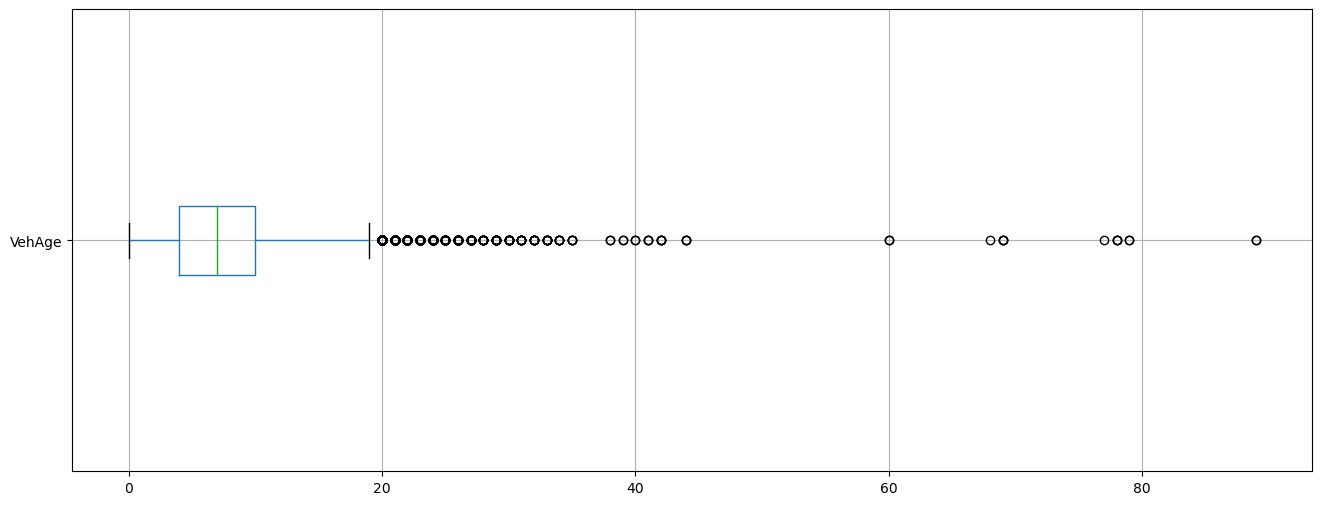

In [106]:
base_prem.boxplot(column = ["VehAge"], vert=False)   # Boîte à moustache de l'âge du véhicule

In [107]:
# Définition des bornes au delà desquelles on a des outliers
q1 = np.quantile(base_prem.VehAge,0.25)
q3 = np.quantile(base_prem.VehAge,0.75)
IQ = q3 - q1
lower_bond = q1 - 1.5*IQ
upper_bond = q3 + 1.5*IQ

In [108]:
upper_outliers_VehAge = base_prem[(base_prem.VehAge > upper_bond)]; upper_outliers_VehAge  
# pas de valeurs extrêmes pour VehAge

,IDpol,Year,DrivAge,DrivGender,BonusMalus,LicenceNb,PayFreq,VehAge,VehClass,VehPower,...,PremAcc1,PremAcc2,PremLegal,PremTPLM,PremTPLV,PremServ,PremTheft,PremTot,AgeClass,BoniMali
69,90152594.101a,2003,49.0,M,50.0,2,Annual,23.0,Cheap,P9,...,27,0,5,54.0,3,49,0,146.0,35-49,Boni
75,90140055.100a,2003,33.0,M,50.0,2,Half-yearly,24.0,Cheap,P5,...,0,0,4,51.8,3,48,0,111.8,25-34,Boni
175,90187999.100a,2003,73.0,F,50.0,1,Annual,22.0,Cheap,P4,...,26,0,5,57.2,3,49,9,207.2,65-79,Boni
219,90149757.100b,2003,34.0,F,50.0,2,Annual,21.0,Cheap,P5,...,25,0,4,44.3,3,49,0,125.3,25-34,Boni
313,90127955.101c,2003,41.0,M,50.0,1,Half-yearly,20.0,Medium,P13,...,0,0,12,153.0,8,57,0,266.0,35-49,Boni
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53049,90159841.100b,2004,39.0,M,80.0,1,Half-yearly,23.0,Cheap,P5,...,28,0,4,89.5,5,57,0,183.5,35-49,Boni
53080,90127192.100a,2003,52.0,F,50.0,4,Quarterly,21.0,Cheap,P5,...,26,0,4,44.3,3,52,0,129.3,50-64,Boni
53102,90145364.101a,2004,38.0,F,57.0,2,Annual,20.0,Cheap,P5,...,27,0,4,54.2,3,55,0,143.2,35-49,Boni
53333,90132340.102c,2004,48.0,M,50.0,4,Half-yearly,29.0,Cheap,P8,...,0,53,10,118.9,5,57,0,243.9,35-49,Boni


On remplace les véhicules avec des âges aberrants par des NA's :

In [109]:
base_prem.VehAge[(base_prem.VehAge > upper_bond)] = np.nan

C:\Users\bspb1\AppData\Local\Temp\ipykernel_3232\705754422.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  base_prem.VehAge[(base_prem.VehAge > upper_bond)] = np.nan


In [110]:
base_prem.isna().sum()

IDpol               0
Year                0
DrivAge             0
DrivGender          0
BonusMalus          0
LicenceNb           0
PayFreq             0
VehAge            775
VehClass            0
VehPower            0
VehGas              0
VehUsage            0
Garage              0
Area                0
Region              0
Channel             0
Marketing           0
PremWindscreen      0
PremDamAll          0
PremFire            0
PremAcc1            0
PremAcc2            0
PremLegal           0
PremTPLM            0
PremTPLV            0
PremServ            0
PremTheft           0
PremTot             0
AgeClass            0
BoniMali            0
dtype: int64

On impute l'âge du véhicule en fonction de la moyenne conditionnelle de VehAge selon le type de véhicule :

In [111]:
base_prem=impute_conditional_mean(base_prem,"VehAge","VehClass")

PayFreq

In [112]:
base_prem.PayFreq.value_counts()

Half-yearly    29831
Annual         17513
Quarterly       4001
Monthly         1539
Yearly           555
Name: PayFreq, dtype: int64

In [113]:
base_prem.PayFreq.replace({"Yearly":"Annual"},inplace=True)

Area

In [114]:
base_prem.Area.value_counts(dropna=False) # pas d'anomalies

A5     15522
A3     13056
A2      7660
A7      7078
A4      3884
A9      3483
A8      1990
A6       660
A10       72
A12       34
Name: Area, dtype: int64

### Region

In [115]:
base_prem.Region.value_counts(dropna=False) # pas d'anomalies

Center          28291
Headquarters    10068
Paris area       8078
South West       7002
Name: Region, dtype: int64

### Channel

In [116]:
base_prem.Channel.value_counts(dropna=False) # pas d'anomalies

A    31063
L    16092
B     6284
Name: Channel, dtype: int64

### Marketing

In [117]:
base_prem.Marketing.value_counts(dropna=False) # pas d'anomalies

M1    27106
M3    10113
M2     8811
M4     7409
Name: Marketing, dtype: int64

### Gestion des doublons

In [118]:
sum(base_prem.duplicated(subset = ["IDpol","Year","DrivAge","DrivGender"])) 
# somme les doublons selon la clé primaire qui choisit un assuré unique


1060

1060 doublons pour cette clé primaire. Analysons les :

In [119]:
doublons_prem = base_prem[base_prem.duplicated(subset = ["IDpol","Year","DrivAge","DrivGender"], keep = False)].sort_values(by = ["Year","IDpol"])
#renvoie tous les doublons, triés selon l'année et le numéro de police
doublons_prem

,IDpol,Year,DrivAge,DrivGender,BonusMalus,LicenceNb,PayFreq,VehAge,VehClass,VehPower,...,PremAcc1,PremAcc2,PremLegal,PremTPLM,PremTPLV,PremServ,PremTheft,PremTot,AgeClass,BoniMali
16190,1000499.100a,2003,26.0,M,68.0,1,Annual,6.0,Cheap,P9,...,0,0,10,163.1,8,54,32,283.1,25-34,Boni
48877,1000499.100a,2003,26.0,M,68.0,1,Annual,6.0,Cheap,P9,...,0,0,10,163.1,8,54,32,283.1,25-34,Boni
47885,1000605.100b,2003,53.0,F,50.0,2,Half-yearly,13.0,Cheap,P11,...,0,0,8,98.3,5,47,0,184.3,50-64,Boni
48345,1000605.100b,2003,53.0,F,50.0,2,Half-yearly,13.0,Cheap,P11,...,0,0,8,98.3,5,47,0,184.3,50-64,Boni
43237,1001352.100a,2003,36.0,F,53.0,2,Annual,4.0,Cheap,P9,...,0,50,8,103.7,5,55,23,337.7,35-49,Boni
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32934,90194527.100c,2004,29.0,F,58.0,2,Annual,1.0,Cheap,P10,...,0,0,14,206.0,11,63,76,569.0,25-34,Boni
38908,90194741.100a,2004,34.0,F,50.0,2,Annual,12.0,Cheap,P9,...,0,0,5,64.8,4,56,20,151.8,25-34,Boni
41311,90194741.100a,2004,34.0,F,50.0,2,Annual,12.0,Cheap,P9,...,0,0,5,64.8,4,56,20,151.8,25-34,Boni
15024,90194773.101a,2004,34.0,F,64.0,2,Annual,6.0,Cheap,P11,...,34,0,10,153.0,8,53,66,354.0,25-34,Boni


Doublons purs: mêmes lignes répétées 2 fois. On peut les supprimer en gardant la première occurence :

In [120]:
base_prem.drop_duplicates(subset=["IDpol","Year","DrivAge","DrivGender"], keep='first', inplace=True)
# garde la première occurence de la clé primaire

In [121]:
sum(base_prem.duplicated(subset = ["IDpol","Year","DrivAge","DrivGender"])) # plus de doublons

0

### Export des bases nettoyées pour l'analyse

In [2]:
base_prem.to_csv("base_prem.csv",sep = ";",index=False,decimal=",") # Export vers un fichier Excel

NameError: name 'base_prem' is not defined

In [18]:
base_freq.to_csv("base_freq.csv",sep = ";",index=False,decimal=",") # Export vers un fichier Excel

In [19]:
base_sev.to_csv("base_sev.csv",sep = ";",index=False,decimal=",") # Export vers un fichier Excel

# Analyse descriptive des données

## Analyse univariée et bivariée

### Import des dernières bases nettoyées :

In [5]:
base_prem=pd.read_csv("base_prem.csv", sep=";",decimal=","); base_prem

,IDpol,Year,DrivAge,DrivGender,BonusMalus,LicenceNb,PayFreq,VehAge,VehClass,VehPower,...,PremAcc1,PremAcc2,PremLegal,PremTPLM,PremTPLV,PremServ,PremTheft,PremTot,AgeClass,BoniMali
0,90182572.101a,2004,32.0,M,80.0,2,Annual,6.886679,Cheap,P12,...,0,56,13,260.2,14,57,130,601.2,25-34,Boni
1,90104346.102b,2003,37.0,M,50.0,2,Annual,12.000000,Cheap,P11,...,0,0,8,96.1,5,49,0,171.1,35-49,Boni
2,90134055.100b,2004,36.0,F,88.0,2,Half-yearly,8.000000,Expensive,P10,...,0,48,16,355.6,19,49,0,651.6,35-49,Boni
3,90144845.100a,2004,45.0,M,50.0,1,Monthly,7.000000,Cheap,P11,...,0,58,11,141.3,8,60,51,349.3,35-49,Boni
4,90132238.100a,2003,51.0,M,50.0,3,Half-yearly,5.000000,Cheap,P13,...,0,53,12,143.7,8,53,53,519.7,50-64,Boni
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52374,90194017.102b,2003,45.0,M,80.0,4,Half-yearly,10.000000,Cheap,P12,...,31,0,9,166.3,9,52,49,351.3,35-49,Boni
52375,90139284.100c,2003,56.0,F,60.0,2,Annual,7.000000,Cheap,P8,...,27,0,5,69.1,4,50,17,185.1,50-64,Boni
52376,90128697.100a,2003,45.0,M,50.0,3,Annual,12.000000,Cheap,P10,...,0,0,5,60.5,4,47,20,152.5,35-49,Boni
52377,90169206.100b,2004,38.0,M,60.0,2,Half-yearly,8.000000,Expensive,P15,...,0,70,19,273.2,15,65,146,700.2,35-49,Boni


In [8]:
base_sev=pd.read_csv("base_sev.csv", sep=";",decimal=","); base_sev

,IDpol,OccurDate,Payment,IDclaim,Guarantee,Year
0,90256234.101d,2003-08-13,598.0,203395,Windscreen,2003
1,90107141.101a,2003-11-09,231.0,207040,Windscreen,2003
2,90149724.101a,2004-06-06,367.0,1202234,TPL,2004
3,90185828.101a,2003-07-21,236.0,201766,TPL,2003
4,90126140.101b,2003-09-24,440.0,205318,Theft,2003
...,...,...,...,...,...,...
9589,90165232.101b,2004-04-19,516.0,1205476,TPL,2004
9590,90132119.100a,2004-08-18,522.0,210364,Windscreen,2004
9591,90126492.102a,2003-06-12,897.0,200676,TPL,2003
9592,90182345.100a,2004-05-01,840.0,1203964,Damage,2004


In [9]:
base_freq=pd.read_csv("base_freq.csv", sep=";",decimal=","); base_freq

,IDpol,Year,Damage,Fire,Other,Theft,TPL,Windscreen
0,90141098.101a,2003,0,0,0,0,0,0
1,90133410.100a,2003,0,0,0,0,0,0
2,90151918.101b,2003,0,0,0,0,0,0
3,90190826.100b,2003,1,0,0,0,0,0
4,90165899.100a,2004,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
62365,90158106.100b,2003,0,0,0,0,0,0
62366,90155850.100a,2003,0,0,0,0,0,0
62367,90148516.100c,2003,0,0,0,0,1,0
62368,90190869.100b,2003,0,0,0,0,0,0


### Répartition des assurés selon le sexe

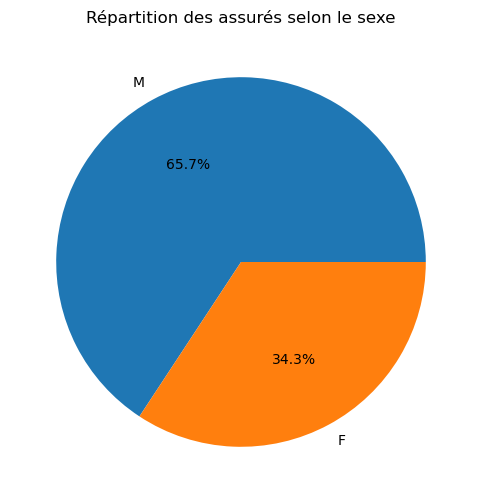

In [123]:
counts = base_prem['DrivGender'].value_counts()
# Créer un graphique en camembert:
plt.pie(counts, labels=counts.index, autopct='%1.1f%%')  # autopct affiche le pourcentage sur le graphique

# Ajouter un titre
plt.title("Répartition des assurés selon le sexe")

# Afficher le graphique
plt.show()


Les deux tiers des assurés de la base sont des hommes.

Cela peut être dangereux car les hommes sont connus pour rencontrer davantage de sinistres en auto que les femmes.
Regardons le BonusMalus et la Prime moyenne payée selon le sexe pour le vérifier:

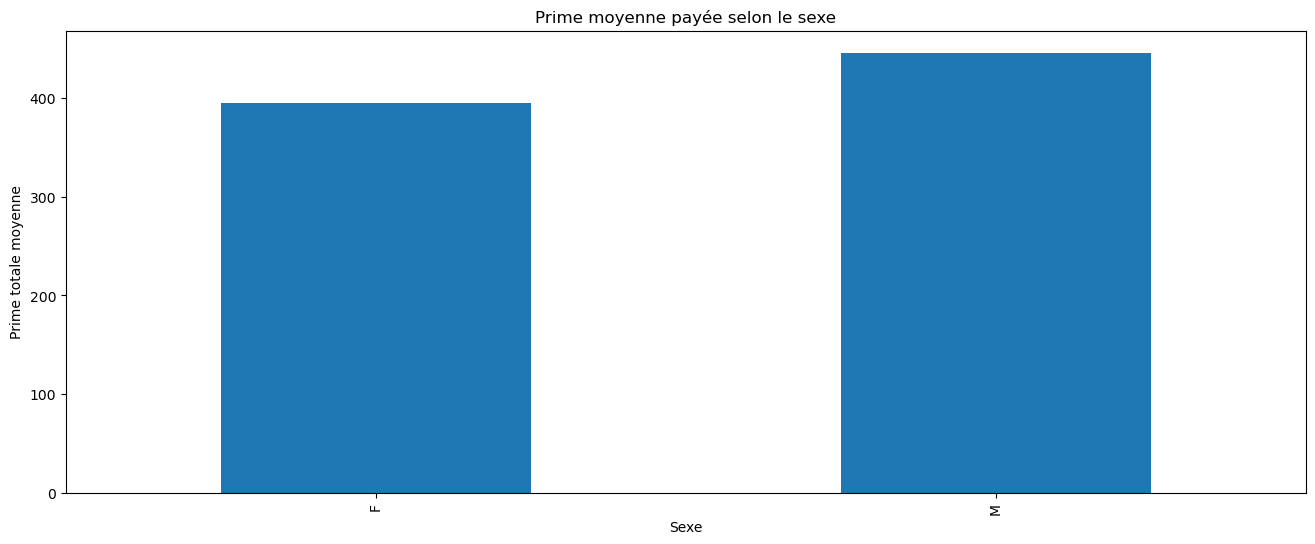

In [124]:

# Calculer la prime moyenne payée selon le sexe
mean_prem = base_prem.groupby("DrivGender")["PremTot"].mean()

# Créer un graphique en barres
mean_prem.plot(kind="bar")

# Titre et étiquettes des axes
plt.title("Prime moyenne payée selon le sexe")
plt.xlabel("Sexe")
plt.ylabel("Prime totale moyenne")

# Afficher le graphique
plt.show()


Les hommes paient en moyenne 50 euros de plus que les femmes par an en moyenne pour leur assurance auto :

In [125]:
mean_prem

DrivGender
F    395.558356
M    446.124694
Name: PremTot, dtype: float64

Cet écart est-il significatif ?

In [126]:
# Test de Student entre la prime moyenne des femmes et celle des hommes :
ttest_ind(base_prem.PremTot[base_prem.DrivGender == "M"],
          base_prem.PremTot[base_prem.DrivGender == "F"], equal_var=True, alternative='two-sided')


Ttest_indResult(statistic=24.54453687455718, pvalue=2.7759136159370973e-132)

La p-value est très petite, donc l'écart de primes est significatif.
Est-ce lié au BonusMalus ?

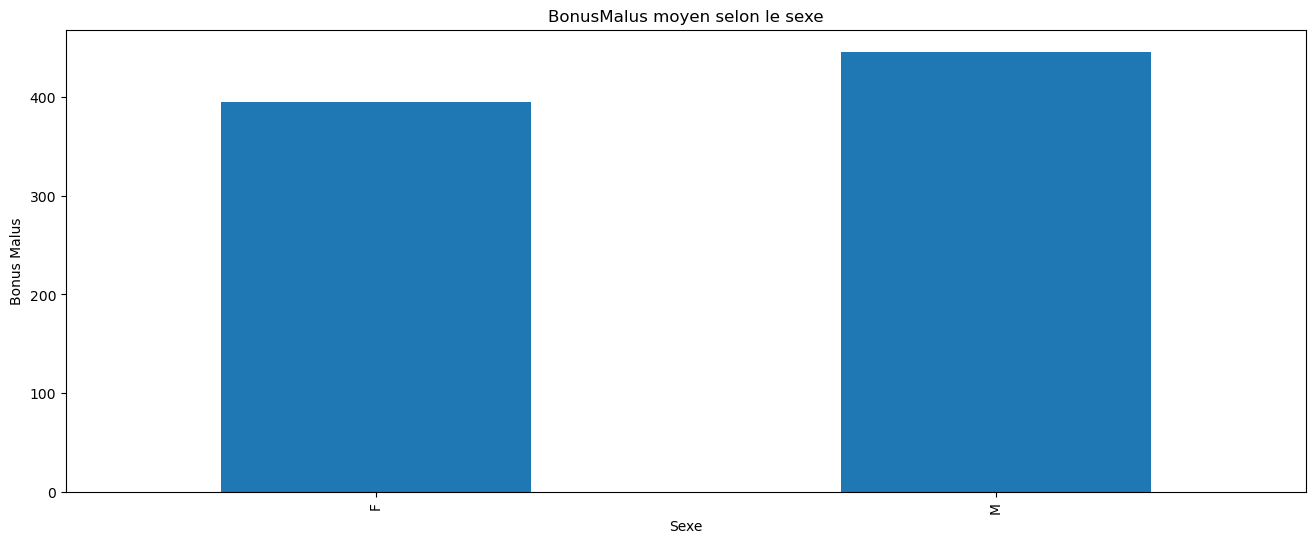

In [127]:
# Calculer la prime moyenne payée selon le sexe
mean_BonusMalus = base_prem.groupby("DrivGender")["BonusMalus"].mean()

# Créer un graphique en barres
mean_prem.plot(kind="bar")

# Titre et étiquettes des axes
plt.title("BonusMalus moyen selon le sexe")
plt.xlabel("Sexe")
plt.ylabel("Bonus Malus")

# Afficher le graphique
plt.show()

Les hommes ont un BonusMalus plus élevé que les femmmes, ce qui est mauvais (plus de sinistres). 
La prime supplémentaire que paient les hommes est donc du à leur BonusMalus du fait du plus grands nombres de sinistres subis. 

In [128]:
# Test de Student entre la prime moyenne des femmes et celle des hommes :
ttest_ind(base_prem.BonusMalus[base_prem.DrivGender == "M"],
          base_prem.BonusMalus[base_prem.DrivGender == "F"], equal_var=True, alternative='two-sided')

Ttest_indResult(statistic=-9.884092416774648, pvalue=5.1117318094271337e-23)

Le test est encore une fois significatif: l'écart du BonusMalus entre les femmes et les hommes est bien significatif

Garantie la plus coûteuse :

In [129]:
base_sev.groupby(by=["Guarantee"]).Payment.describe()

,count,mean,std,min,25%,50%,75%,max
Guarantee,,,,,,,,
Accident,370.0,2018.175676,2638.700336,0.0,443.75,1244.0,2441.250000,17606.0
Damage,596.0,1821.671826,2583.580429,0.0,524.75,1456.5,1787.517451,24728.0
Fire,110.0,1975.558840,2966.911094,0.0,83.50,907.0,2120.086614,12612.0
Other,231.0,839.596768,1231.049815,0.0,86.50,525.0,876.000000,8931.0
TPL,4414.0,1686.605636,11295.799878,0.0,381.00,897.0,1649.829963,632893.0
Theft,561.0,1762.352699,2271.545124,0.0,556.00,1044.0,1845.864407,20418.0
Windscreen,3312.0,294.008964,550.109057,0.0,175.00,283.0,337.000000,18035.0


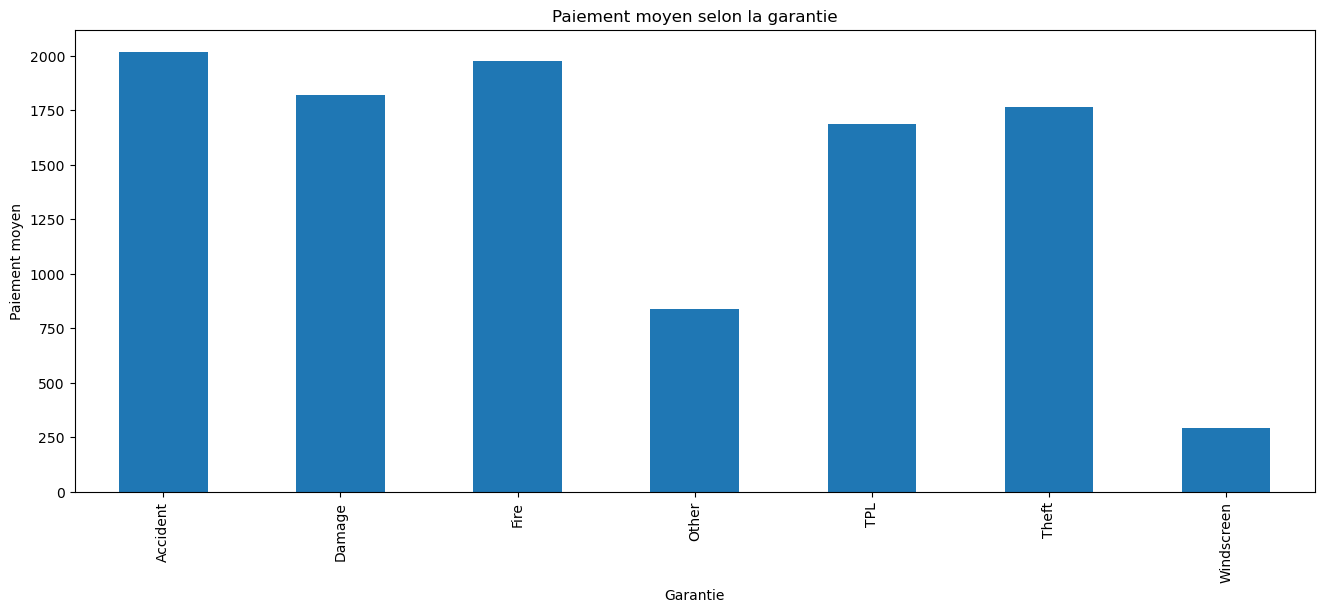

In [130]:
# Calculer le paiement moyen de sinistre selon la garantie
mean_payment = base_sev.groupby("Guarantee")["Payment"].mean()

# Créer un graphique en barres
mean_payment.plot(kind="bar")

# Titre et étiquettes des axes
plt.title("Paiement moyen selon la garantie")
plt.xlabel("Garantie")
plt.ylabel("Paiement moyen")

# Afficher le graphique
plt.show()

La garantie Accident est la plus coûteuse et la plus volatile, suivie par la garantie Fire. De plus on observe des valeurs extrêmes pour les garanties TPL et Windscreen

Primes totales selon la classe d'âge :

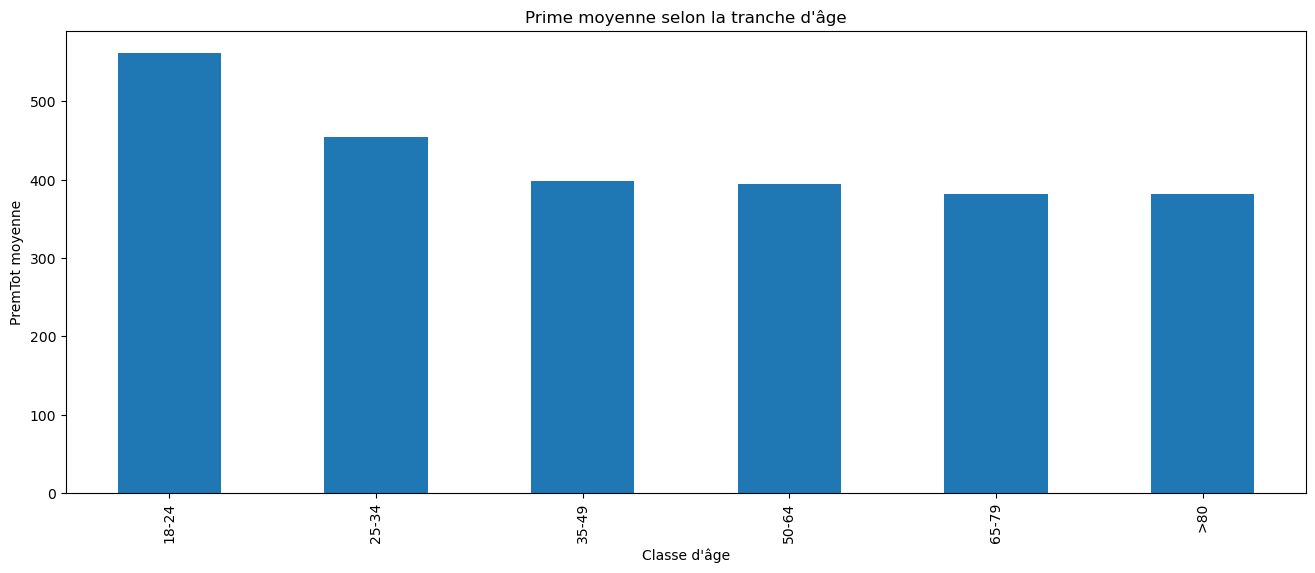

In [131]:
# Calculer la Prime moyenne selon la tranche d'âge
mean_PremTot_Age = base_prem.groupby("AgeClass")["PremTot"].mean()

# Créer un graphique en barres
mean_PremTot_Age.plot(kind="bar")

# Titre et étiquettes des axes
plt.title("Prime moyenne selon la tranche d'âge")
plt.xlabel("Classe d'âge")
plt.ylabel("PremTot moyenne")

# Afficher le graphique
plt.show()

Plus on est jeunes, plus la prime est élevée
Les jeunes ont une "surprime"

Comparaisons avec le BonusMalus selon la classe d'âge :

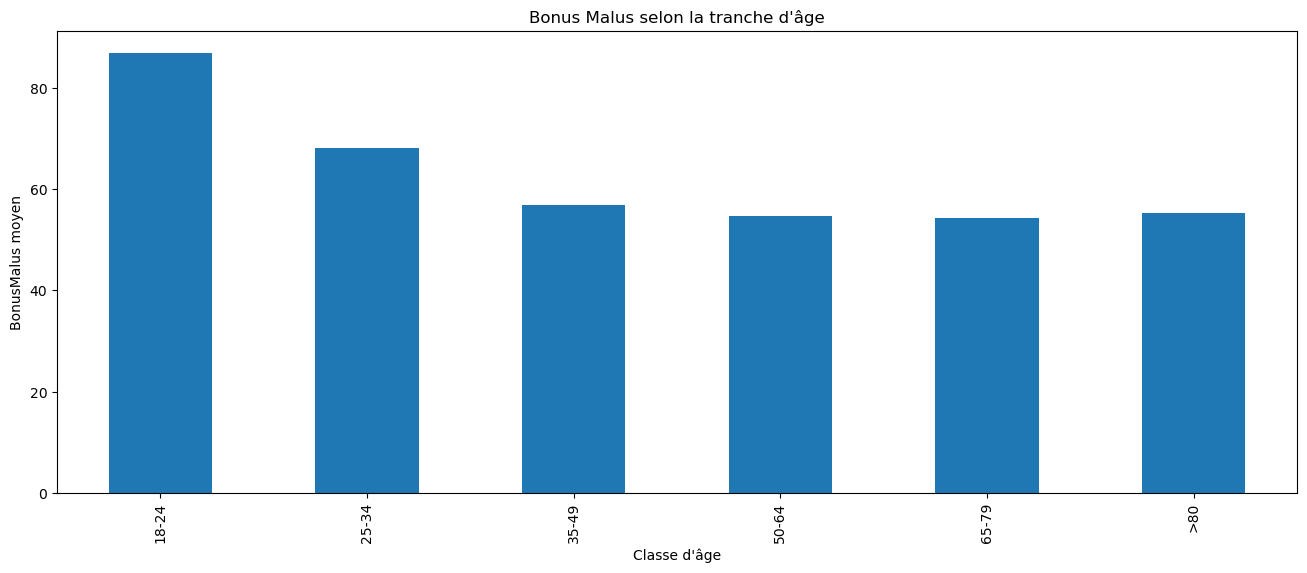

In [132]:
# Calculer le bonus malus moyen selon la garantie
mean_BonusMalus_Age = base_prem.groupby("AgeClass")["BonusMalus"].mean()

# Créer un graphique en barres
mean_BonusMalus_Age.plot(kind="bar")

# Titre et étiquettes des axes
plt.title("Bonus Malus selon la tranche d'âge")
plt.xlabel("Classe d'âge")
plt.ylabel("BonusMalus moyen")

# Afficher le graphique
plt.show()

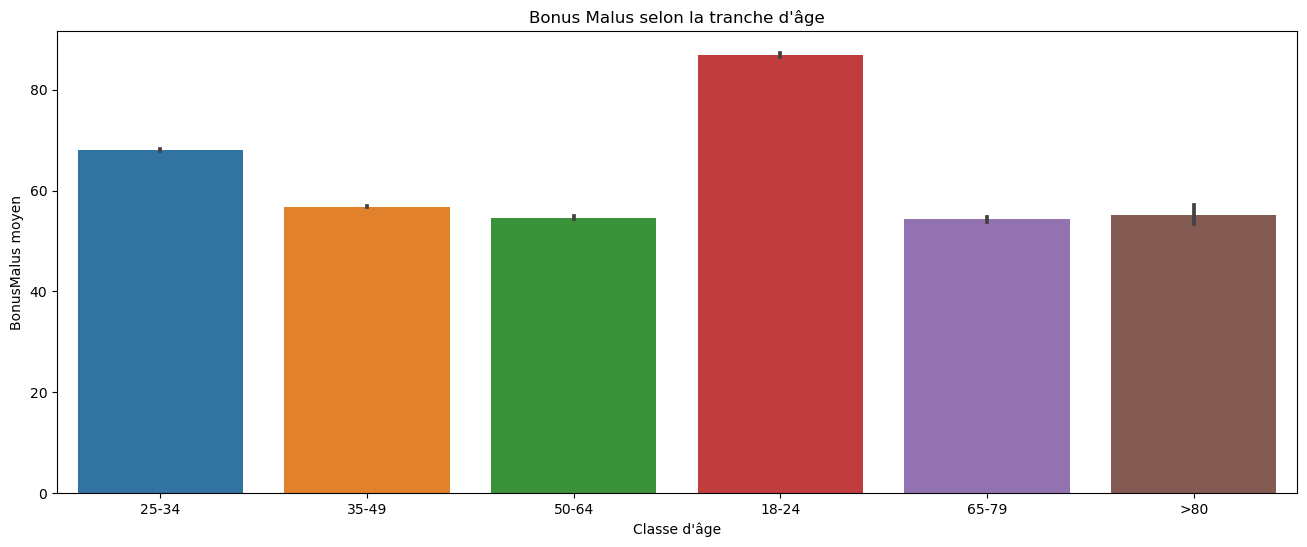

In [133]:
sns.barplot(x='AgeClass', y='BonusMalus', data=base_prem)
# Prime totale selon le sexe
# Titre et étiquettes des axes
plt.title("Bonus Malus selon la tranche d'âge")
plt.xlabel("Classe d'âge")
plt.ylabel("BonusMalus moyen")

# Afficher le graphique
plt.show()

Pareil pour le BonusMalus : les jeunes paient plus cher à cause de leurs BonusMalus très élevé, 
    lié à un nombre de sinitres plus important

Répartition des assurés par région :

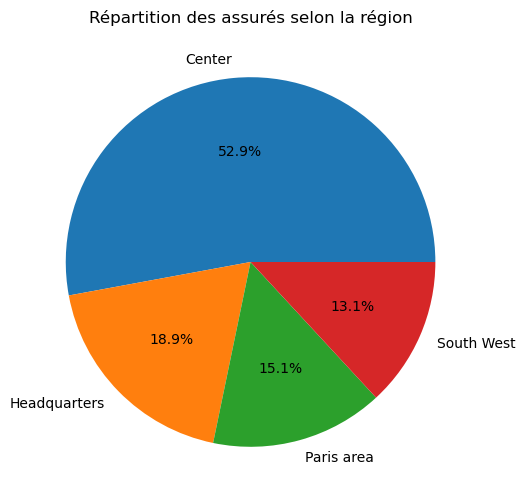

In [134]:
counts = base_prem['Region'].value_counts()
# Créer un graphique en camembert:
plt.pie(counts, labels=counts.index, autopct='%1.1f%%')  # autopct affiche le pourcentage sur le graphique

# Ajouter un titre
plt.title("Répartition des assurés selon la région")

# Afficher le graphique
plt.show()

La majorité des assurés de la base sont au centre de la France

Regardons la prime totale moyenne et le bonus Malus des asurés selon la région :

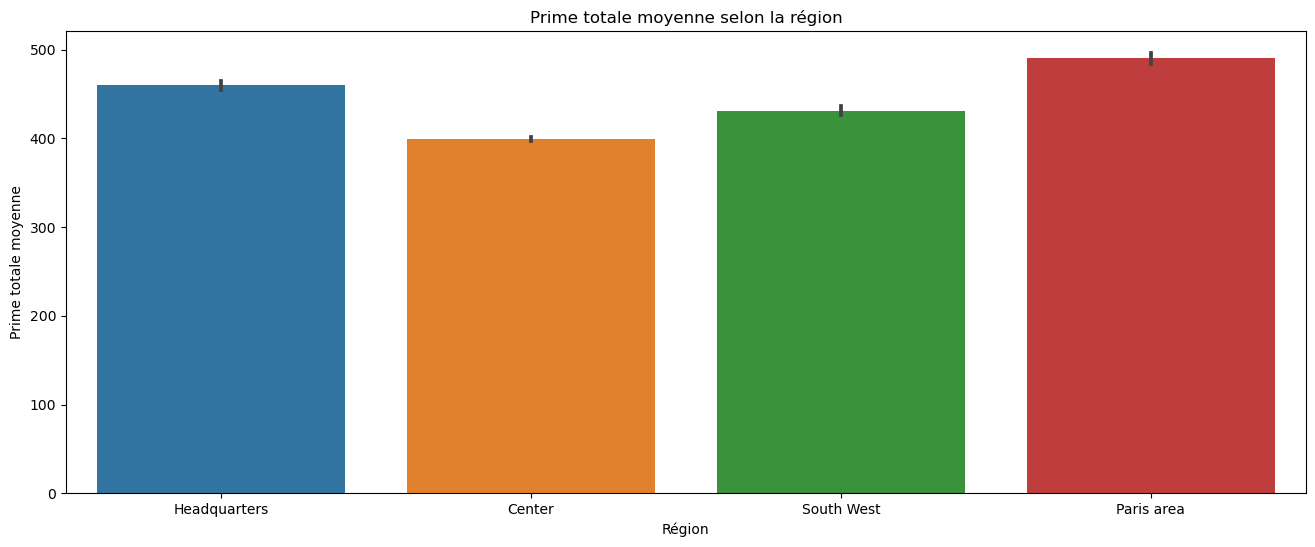

In [135]:
sns.barplot(x='Region', y='PremTot', data=base_prem)
# Prime totale selon la région

# Titre et étiquettes des axes
plt.title("Prime totale moyenne selon la région")
plt.xlabel("Région")
plt.ylabel("Prime totale moyenne")

# Afficher le graphique
plt.show()

Les assurés de Paris payent plus de primes que ceux des autres régions.
Cela correspond il à une suraccidentation en région parisienne ?
Vérifions le avec l'analyse du BonusMalus :

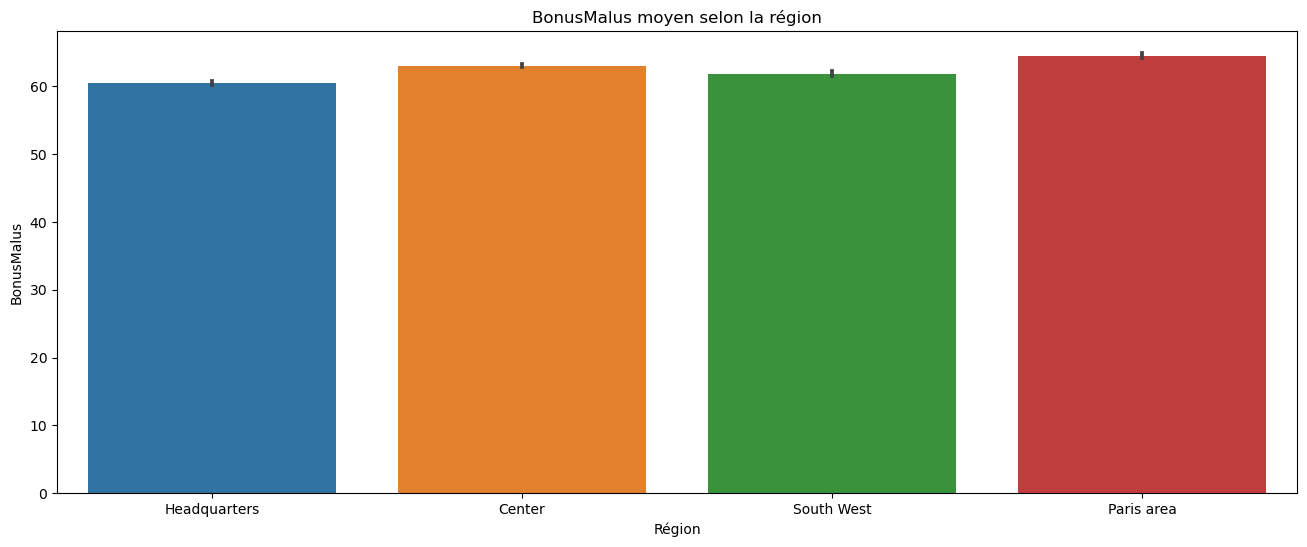

In [136]:
sns.barplot(x='Region', y='BonusMalus', data=base_prem)
# BonusMalus selon la région

# Titre et étiquettes des axes
plt.title("BonusMalus moyen selon la région")
plt.xlabel("Région")
plt.ylabel("BonusMalus")

# Afficher le graphique
plt.show()

Le BonusMalus à Paris est légèrement élevée que dans les autres régions, mais on a peut-être une surtarification des primes pour les assurés parisiens, car cette différence du BonusMalus est faible

### Analyse du type de véhicule :

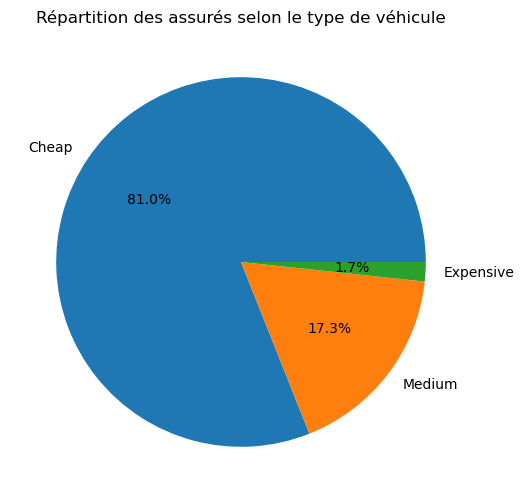

In [137]:
counts = base_prem['VehClass'].value_counts()
# Créer un graphique en camembert:
plt.pie(counts, labels=counts.index, autopct='%1.1f%%')  # autopct affiche le pourcentage sur le graphique

# Ajouter un titre
plt.title("Répartition des assurés selon le type de véhicule")

# Afficher le graphique
plt.show()

La grande majorité des véhicules assurés sont bons marchés.
On peut regarder si ces véhicules sont associés à une plus granded sinistralité à travers l'étude de leur BonusMalus :

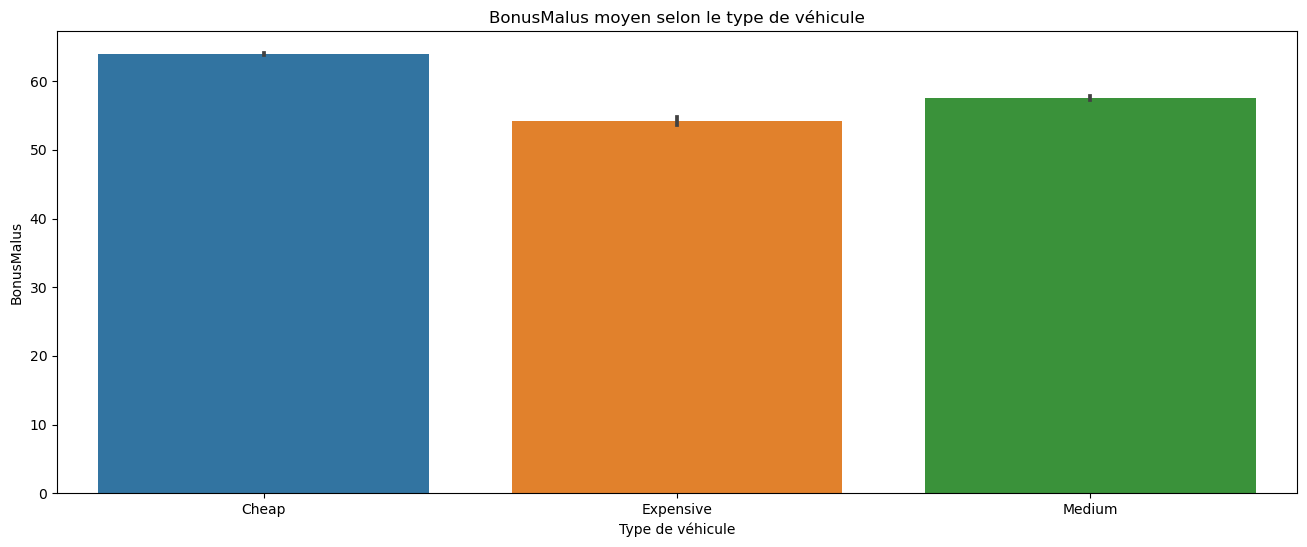

In [138]:
sns.barplot(x='VehClass', y='BonusMalus', data=base_prem)
# BonusMalus selon la région

# Titre et étiquettes des axes
plt.title("BonusMalus moyen selon le type de véhicule")
plt.xlabel("Type de véhicule")
plt.ylabel("BonusMalus")

# Afficher le graphique
plt.show()

Les véhicules bons marchés sont biens associés à plus de sinistres avec un BonusMalus important.
Cela incite à de la prudence car ils représentent plus de 80% du parc automobile assuré

### Corrélation entre les variables de ma base des primes:

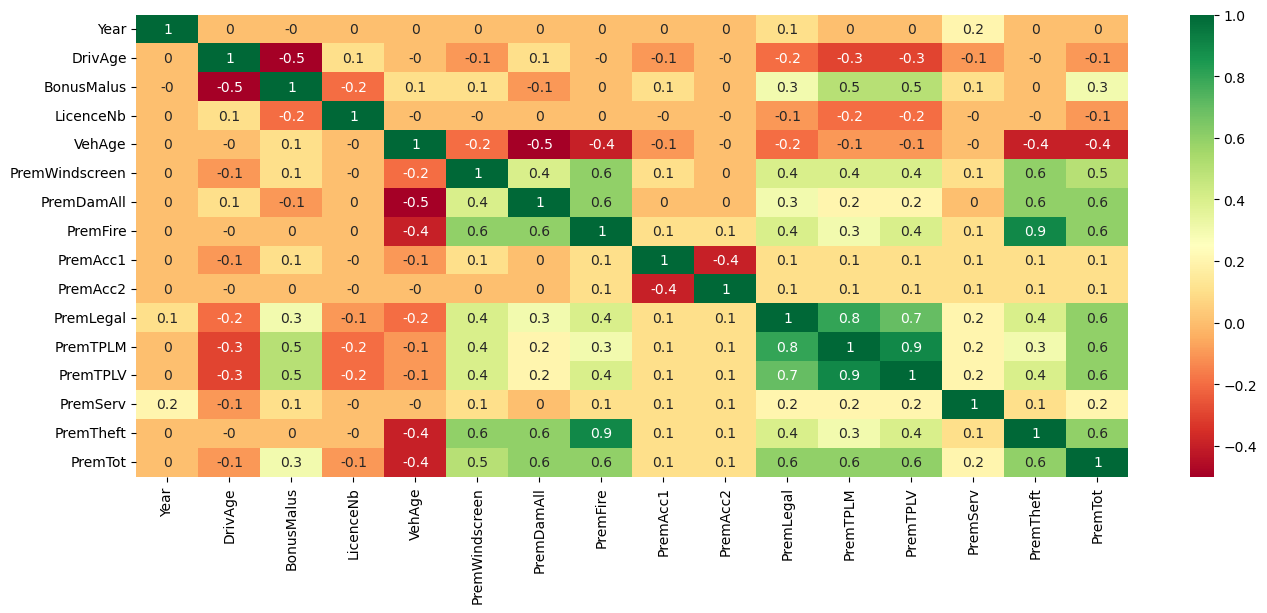

In [141]:
sns.heatmap(round(base_prem.corr(method='kendall'),1), annot=True, cmap="RdYlGn") 
# heatmap via sns
plt.show()

BonusMalus et DrivAge sont négativements corrélées: c'est logique, plus le conducteur est âgé plus son BonusMalus est petit (bon)

On a aussi des corrélations présentes entre les différentes primes :
Les trois primes Legal, TPLM et TPLV sont très fortement corrélées: cela veut dire que lorsqu'un assuré souscrit la garantie responsabilité civile obligatoire, il a tendance a souscrire en même temps une RC complémentaire et une garantie protection juridique.

La garantie vol est très fortement corrélée à la garantie Incendie: les deux sont très souvent souscriptes ensemble

Toutes les primes sont inversement corrélées à l' âge du véhicule: c'est parce que plus le véhicule est âgé plus il perd de la valeur et moins il coûtera cher à assurer

### Analyse du Nombre de sinistres :

In [142]:
base_freq

,IDpol,Year,Damage,Fire,Other,Theft,TPL,Windscreen
0,90141098.101a,2003,0,0,0,0,0,0
1,90133410.100a,2003,0,0,0,0,0,0
2,90151918.101b,2003,0,0,0,0,0,0
3,90190826.100b,2003,1,0,0,0,0,0
4,90165899.100a,2004,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
62372,90158106.100b,2003,0,0,0,0,0,0
62373,90155850.100a,2003,0,0,0,0,0,0
62374,90148516.100c,2003,0,0,0,0,1,0
62375,90190869.100b,2003,0,0,0,0,0,0


In [143]:
base_freq.groupby(by=["Year"]).sum()
# Nombre de sinistres par année et par garantie

,Damage,Fire,Other,Theft,TPL,Windscreen
Year,,,,,,
2003,460,12,3688,257,2261,1627
2004,517,100,3791,309,2080,1651


On conclut que pour l'ensemble des garanties hormis TPL, on a eu plus de sinistres en 2004 qu'en 2003

De plus la garantie TPL est celle où on observe le plus de sinistre , suivie par la garantie Windscreen

Cette garantie est donc à surveiller, sachant que c'est celle où on a laussi les règlements les plus importants.

### Garage :

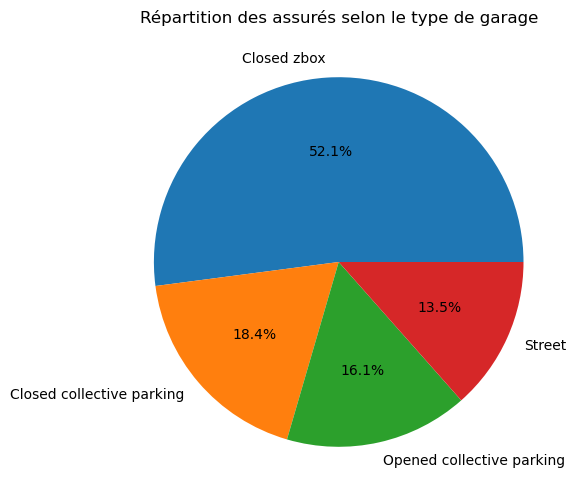

In [144]:
counts = base_prem['Garage'].value_counts()
# Créer un graphique en camembert:
plt.pie(counts, labels=counts.index, autopct='%1.1f%%')  # autopct affiche le pourcentage sur le graphique

# Ajouter un titre
plt.title("Répartition des assurés selon le type de garage")

# Afficher le graphique
plt.show()

La majorité des assurés garent leur voiture dans une place de parking personnelle fermée aux autres usagers.
Le type de garage présentant le plus de risques de sinistres ou dégradations sur le véhicule est dans l'ordre:

1 . Garé dans la rue (Street)

2 . Le parking ouvert d'accès (Opened collective parking)

3 . Le parking fermé d'accès (Closed collective parking)

4 . Le garage personnel fermé d'accès (Closed zbox)

# Analyse des Correspondances Multiples

### Objectif : Visualiser les ressemblances entre les modalités des variables sélectionner et analyser les liens entre ces variables

### Sélection des variables pour l'ACM

In [145]:
DActives = base_prem[['AgeClass','DrivGender' ,'BoniMali', 'VehClass']]
# Les 4 variables qualis les plus pertinentes pour regrouper les individus de la base

In [146]:
DActives

,AgeClass,DrivGender,BoniMali,VehClass
0,25-34,M,Boni,Cheap
1,35-49,M,Boni,Cheap
2,35-49,F,Boni,Expensive
3,35-49,M,Boni,Cheap
4,50-64,M,Boni,Cheap
...,...,...,...,...
52374,35-49,M,Boni,Cheap
52375,50-64,F,Boni,Cheap
52376,35-49,M,Boni,Cheap
52377,35-49,M,Boni,Expensive


In [159]:
# nombre de variables :
p =DActives.shape[1]
print("Nous avons",p,"variables à étudier")

Nous avons 4 variables à étudier


In [158]:
#nombre d'observations
n =DActives.shape[0]
print("Nous avons",n,"observations dans notre base")

Nous avons 52379 observations dans notre base


### Tableau de Burt

In [150]:
# Transformations des variables étudier en indicatrices pour le tableau de Burt:

X =pd.get_dummies(DActives,prefix='',prefix_sep='') # codage en 0/1
print(X)

       18-24  25-34  35-49  50-64  65-79  >80  F  M  Boni  Mali  Cheap  \
0          0      1      0      0      0    0  0  1     1     0      1   
1          0      0      1      0      0    0  0  1     1     0      1   
2          0      0      1      0      0    0  1  0     1     0      0   
3          0      0      1      0      0    0  0  1     1     0      1   
4          0      0      0      1      0    0  0  1     1     0      1   
...      ...    ...    ...    ...    ...  ... .. ..   ...   ...    ...   
52374      0      0      1      0      0    0  0  1     1     0      1   
52375      0      0      0      1      0    0  1  0     1     0      1   
52376      0      0      1      0      0    0  0  1     1     0      1   
52377      0      0      1      0      0    0  0  1     1     0      0   
52378      0      1      0      0      0    0  1  0     1     0      1   

       Expensive  Medium  
0              0       0  
1              0       0  
2              1       0  
3  

In [157]:
#nombre total de modalités
M =X.shape[1]
print("Nous avons",M,"modalités à étudier")

Nous avons 13 modalités à étudier


### ACM avec le package fanalysis

In [153]:
# instanciation
acm = MCA(row_labels=DActives.index,var_labels=DActives.columns)
acm.fit(DActives.values) # ajustement sur le jeu de données

MCA(row_labels=RangeIndex(start=0, stop=52379, step=1),
    var_labels=Index(['AgeClass', 'DrivGender', 'BoniMali', 'VehClass'], dtype='object'))

### 1. Analyse des facteurs

In [156]:
#nombre max de facteurs
Hmax =M-p
print("Nous avons au maximum",Hmax,"axes factoriels")

Nous avons au maximum 9 axes factoriels


L’identification des facteurs pertinents reste toujours un problème difficile en analyse factorielle. 
Tenons-nous en aux approches classiques basées sur l’étude des valeurs propres dans un premier temps. 
Nous les affichons ainsi que les pourcentages d’inertie expliquée associés aux facteurs, individuels et cumulés.
Nous pouvons avoir 9 facteurs au maximum.

In [161]:
# Tableau des valeurs propres et de la variance expliquée :

print(pd.DataFrame(np.transpose(acm.eig_),columns=['Val.P','%','Cumul %'],index=range(1,Hmax+1)))

      Val.P          %     Cumul %
1  0.328577  14.603430   14.603430
2  0.277260  12.322659   26.926089
3  0.257916  11.462916   38.389004
4  0.251979  11.199076   49.588080
5  0.250000  11.111111   60.699191
6  0.245259  10.900401   71.599592
7  0.235575  10.470010   82.069602
8  0.205173   9.118781   91.188383
9  0.198261   8.811617  100.000000


Avec la règle de Kaiser, on sélectionne les axes expliquant au moins 1/Hmax de l'inertie totale :

In [172]:
# Seuil du critère de Kaiser:
1/Hmax

0.1111111111111111

Ici on choisit les 5 premiers axes qui représentent 60.69% de l'inertie.
On peut encore pousser plus loin sur le choix des 5 axes en appliquant la méthode du coude avec l'éboulis des valeurs proppres.

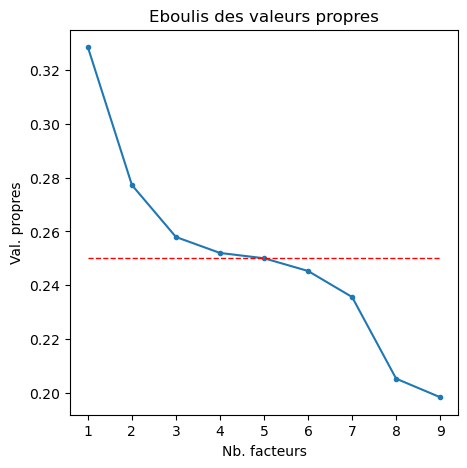

In [174]:
#éboulis des v.p
fix,ax =plt.subplots(figsize=(5,5))
ax.plot(range(1,Hmax+1),acm.eig_[0],".-")
ax.set_xlabel("Nb. facteurs")
ax.set_ylabel("Val. propres")
plt.title("Eboulis des valeurs propres")

#seuil - Critère de Kaiser
ax.plot([1,Hmax],[1/p,1/p],"r--",linewidth=1)
plt.show()

Avec le critère du coude ("the elbow method") on sélectionne 3 axes. Cette méthode étant graphique et pas sûr à 100% donc on choisit la première méthode.

### 2. Analyse des modalités

Coordonnées factorielles

In [175]:
#affichage des coordonnées factorielles
print(pd.DataFrame(acm.col_coord_[:,:5],index=X.columns,columns=['Coord.F1','Coord.F2','Coord.F3','Coord.F4','Coord.F5']))

           Coord.F1  Coord.F2   Coord.F3  Coord.F4      Coord.F5
18-24      1.916173 -1.842301   0.301856  0.574605 -9.700009e-04
25-34      0.336696  0.494326  -0.044482 -0.646746 -8.480279e-02
35-49     -0.356645  0.189157   0.287954  0.932318  3.633947e-01
50-64     -0.667247 -0.570314  -0.742519 -0.550749 -1.739352e+00
65-79     -0.756459 -1.044827   0.264091 -3.311067  3.225620e+00
>80       -0.897412 -1.928992 -13.133505  3.736912  9.475005e+00
F          0.667860  0.738967  -0.196508  0.178749 -4.850548e-14
M         -0.348050 -0.385107   0.102409 -0.093154  2.532547e-14
Boni      -0.080788  0.087898  -0.026872 -0.010748  2.467855e-15
Mali       3.060722 -3.330081   1.018046  0.407184 -9.219431e-14
Cheap      0.298887  0.101271  -0.132136 -0.062202  1.695194e-14
Expensive -2.084431 -2.074395  -4.334708  1.209407 -2.072666e-14
Medium    -1.198092 -0.272141   1.043730  0.173481 -7.766145e-14


### 3. La contribution

In [177]:
#affichage des contributions des modalités selon les différents axes :
print(pd.DataFrame(acm.col_contrib_[:,:5],index=X.columns,
                   columns=['Contrib.F1','Contrib.F2','Contrib.F3','Contrib.F4','Contrib.F5']))



           Contrib.F1  Contrib.F2  Contrib.F3  Contrib.F4    Contrib.F5
18-24       20.368751   22.313447    0.643955    2.388398  6.860200e-06
25-34        3.088274    7.888906    0.068669   14.858672  2.574880e-01
35-49        3.828493    1.276296    3.179522   34.115934  5.224091e+00
50-64        4.675814    4.048209    7.376648    4.153968  4.175959e+01
65-79        1.454636    3.288691    0.225865   36.340600  3.476220e+01
>80          0.122834    0.672583   33.516278    2.777367  1.799662e+01
F           11.626799   16.869008    1.282358    1.086048  8.060610e-26
M            6.059212    8.791147    0.668290    0.565985  4.216434e-26
Boni         0.483822    0.678731    0.068192    0.011166  5.933688e-28
Mali        18.329925   25.714195    2.583496    0.423027  2.185841e-26
Cheap        5.507897    0.749363    1.371425    0.311065  2.328672e-26
Expensive    5.585519    6.555746   30.772883    2.451921  7.258465e-28
Medium      18.868022    1.153679   18.242419    0.515850  1.041

### Qualité de représentation cos2

In [179]:
#affichage des COS2 pour chaque modalité selon les différents axes factoriels
print(pd.DataFrame(acm.col_cos2_[:,:5],index=X.columns,columns=['Cos2.F1','Cos2.F2','Cos2.F3','Cos2.F4','Cos2.F5']))

            Cos2.F1   Cos2.F2   Cos2.F3   Cos2.F4       Cos2.F5
18-24      0.288762  0.266927  0.007166  0.025966  7.399720e-08
25-34      0.063228  0.136288  0.001104  0.233292  4.010993e-03
35-49      0.083253  0.023419  0.054272  0.568926  8.643397e-02
50-64      0.071296  0.052086  0.088289  0.048573  4.844682e-01
65-79      0.019779  0.037734  0.002411  0.378944  3.596377e-01
>80        0.001618  0.007474  0.346469  0.028050  1.803277e-01
F          0.232449  0.284581  0.020124  0.016651  1.226133e-27
M          0.232449  0.284581  0.020124  0.016651  1.230719e-27
Boni       0.247271  0.292708  0.027356  0.004376  2.307354e-28
Mali       0.247271  0.292708  0.027356  0.004376  2.243537e-28
Cheap      0.381695  0.043820  0.074601  0.016531  1.227839e-27
Expensive  0.074673  0.073955  0.322928  0.025138  7.383212e-30
Medium     0.299773  0.015467  0.227504  0.006285  1.259572e-27


## Analyse GLOBALE

### Analyse des contribution et de la qualité de représentation sur les axes

Les assurés âgés de 18 à 24 ans contribuent aux axes 1 et 2. Ils sont mieux représentés sur ces axes.

Les assurés âgés de 25 et 34 ans contribuent plus aux axes 2 et 4. Ils sont mieux représentés sur ces axes.

Les assurés âgés de 35 à 49 ans contribuent aux axes 1 et 4. Ils sont mieux représentés sur ces axes.

Les assurés âgés de 50 à 64 ans, contribuent plus aux axes 1 et 3. Ils sont mieux représentés sur ces axes.

Les assurés âgés de 65 à 79 ans, contribuent plus aux axes 2 et 4. Ils sont mieux représentés sur ces axes

Les assurés qui ont plus de 80 ans contribuent plus aux axes 3 et 4. Ils sont mieux représentés sur ces axes.

Les femmes,les hommes, les bonis et les malis sont mieux représentés sur le premier plan factoriel (axe 1 et 2) et contribuent plus sur ce dernier.

Le sexe et le BoniMali sont mieux représentés sur le premier plan factoriel (axe 1 et 2) et contribuent plus à ce dernier.

Les modalités de la classe du véhicule de nos assurés contribuent plus aux axes 1 et 3 mais sont aussi mieux représentées sur ces axes, sauf “Expensive" qui contribue plus et est mieux représentée sur l'axe 2 et 3.


### Synthèse

Nous allons commenter en fonction de la contribution.

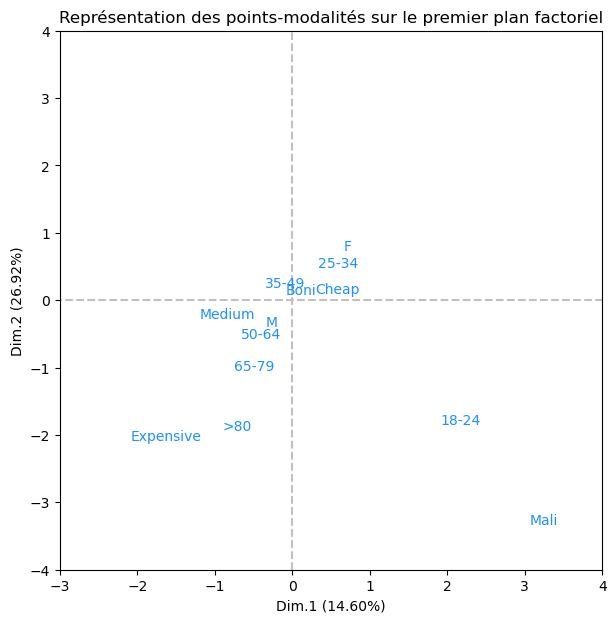

In [181]:
#représentation dans le plan
fix,ax =plt.subplots(figsize=(7,7))
ax.axis([-3,+4,-4,+4])
ax.plot([-4,+4],[0,0],color='silver',linestyle='--')
ax.plot([0,0],[-4,+4],color='silver',linestyle='--')
ax.set_xlabel("Dim.1 (14.60%)")
ax.set_ylabel("Dim.2 (26.92%)")
plt.title("Représentation des points-modalités sur le premier plan factoriel")

for i in range(X.shape[1]):
    ax.text(acm.col_coord_[i,0],acm.col_coord_[i,1],X.columns[i],color='dodgerblue')
plt.show()

On peut diviser nos assurés en 4 groupes :

 - Les 18-24 sont les mauvais conducteurs avec un mauvais bonusMalus

- Les femmes ainsi que les personnes de 25 à 49 ans sont des bons conducteurs avec des véhicules bons marché

- Les hommes ainsi que les personnes de 50 à 79 ans sont de bons conducteurs avec des véhicules un peu plus chers, de milieu de gamme.

 - Enfin les personnes de plus de 80 ans forment une classe à part, avec des véhicules chers.

Il sera difficile d'interpréter les individus parce qu'ils ne sont pas indentifiables.

# 2. Analyse des individus

### Coordonnées

In [185]:
#coordonnées des individus dans le plan
print(pd.DataFrame(acm.row_coord_[:,:4],index=X.index,columns=['Contrib.F1','Contrib.F2','Contrib.F3','Contrib.F4']))

       Contrib.F1  Contrib.F2  Contrib.F3  Contrib.F4
0        0.090169    0.141670   -0.049759   -0.404825
1       -0.212222   -0.003219    0.113889    0.381600
2       -0.808596   -0.502499   -2.102048    1.150319
3       -0.212222   -0.003219    0.113889    0.381600
4       -0.347687   -0.363805   -0.393380   -0.357015
...           ...         ...         ...         ...
52374   -0.212222   -0.003219    0.113889    0.381600
52375    0.095388    0.169888   -0.540527   -0.221599
52376   -0.212222   -0.003219    0.113889    0.381600
52377   -1.251671   -1.036192   -1.954901    1.014903
52378    0.533243    0.675363   -0.196905   -0.269409

[52379 rows x 4 columns]


### Représentation des individus dans le premier plan factoriel

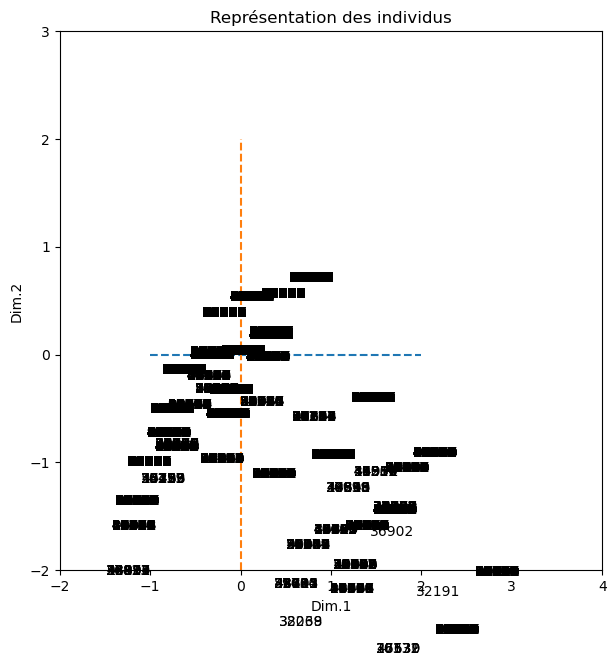

In [183]:
fix,ax =plt.subplots(figsize=(7,7))
ax.axis([-2,+4,-2,+3])
ax.plot([-1,+2],[0,0],linestyle='--')
ax.plot([0,0],[-2,+2],linestyle='--')
ax.set_xlabel("Dim.1")
ax.set_ylabel("Dim.2")
plt.title("Représentation des individus")

for i in range(X.shape[0]):
    ax.text(acm.row_coord_[i,0],acm.row_coord_[i,1],X.index[i])
    
plt.show()  

### Contributions

In [184]:
print(pd.DataFrame(acm.row_contrib_[:,:4],index=X.index,columns=['Contrib.F1','Contrib.F2','Contrib.F3','Contrib.F4']))

       Contrib.F1    Contrib.F2  Contrib.F3  Contrib.F4
0        0.000047  1.382016e-04    0.000018    0.001242
1        0.000262  7.136544e-08    0.000096    0.001103
2        0.003799  1.738707e-03    0.032708    0.010026
3        0.000262  7.136544e-08    0.000096    0.001103
4        0.000702  9.113649e-04    0.001145    0.000966
...           ...           ...         ...         ...
52374    0.000262  7.136544e-08    0.000096    0.001103
52375    0.000053  1.987386e-04    0.002163    0.000372
52376    0.000262  7.136544e-08    0.000096    0.001103
52377    0.009103  7.393264e-03    0.028289    0.007804
52378    0.001652  3.140729e-03    0.000287    0.000550

[52379 rows x 4 columns]


# Modélisation des primes futures selon les caractéristiques des assurés

In [186]:
base_prem

,IDpol,Year,DrivAge,DrivGender,BonusMalus,LicenceNb,PayFreq,VehAge,VehClass,VehPower,...,PremAcc1,PremAcc2,PremLegal,PremTPLM,PremTPLV,PremServ,PremTheft,PremTot,AgeClass,BoniMali
0,90182572.101a,2004,32.0,M,80.0,2,Annual,6.886679,Cheap,P12,...,0,56,13,260.2,14,57,130,601.2,25-34,Boni
1,90104346.102b,2003,37.0,M,50.0,2,Annual,12.000000,Cheap,P11,...,0,0,8,96.1,5,49,0,171.1,35-49,Boni
2,90134055.100b,2004,36.0,F,88.0,2,Half-yearly,8.000000,Expensive,P10,...,0,48,16,355.6,19,49,0,651.6,35-49,Boni
3,90144845.100a,2004,45.0,M,50.0,1,Monthly,7.000000,Cheap,P11,...,0,58,11,141.3,8,60,51,349.3,35-49,Boni
4,90132238.100a,2003,51.0,M,50.0,3,Half-yearly,5.000000,Cheap,P13,...,0,53,12,143.7,8,53,53,519.7,50-64,Boni
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52374,90194017.102b,2003,45.0,M,80.0,4,Half-yearly,10.000000,Cheap,P12,...,31,0,9,166.3,9,52,49,351.3,35-49,Boni
52375,90139284.100c,2003,56.0,F,60.0,2,Annual,7.000000,Cheap,P8,...,27,0,5,69.1,4,50,17,185.1,50-64,Boni
52376,90128697.100a,2003,45.0,M,50.0,3,Annual,12.000000,Cheap,P10,...,0,0,5,60.5,4,47,20,152.5,35-49,Boni
52377,90169206.100b,2004,38.0,M,60.0,2,Half-yearly,8.000000,Expensive,P15,...,0,70,19,273.2,15,65,146,700.2,35-49,Boni


In [187]:
# Montant total des primes par garantie
base_prem[['PremWindscreen','PremDamAll','PremFire','PremAcc1','PremAcc2',
          'PremLegal','PremTPLM','PremTPLV','PremServ','PremTheft','PremTot']].sum().sort_values()

PremFire            231762.0
PremTPLV            448962.0
PremLegal           546097.0
PremAcc1            678110.0
PremAcc2            806317.0
PremWindscreen     1351686.0
PremTheft          2440946.0
PremServ           2816428.0
PremDamAll         4354344.0
PremTPLM           8785500.4
PremTot           22460152.4
dtype: float64

TPLM est la garantie représentant le plus grand nombre de primes dans notre portefeuille, car elle est associée à la garantie responsabilité civile obligatoire

Nous modéliserons donc cette garantie selon les caractéristiques des assurés pour la suite

## Jointures ??

In [188]:
# Tentative de jointure interne entre base_sev et base_prem :

base_cm = pd.merge(base_prem, base_sev, on=['IDpol','Year'])  # clé IDpol et Year choisie pour la jointure
# par défaut : jointure interne

In [189]:
base_sev['Payment'].sum() - base_cm['Payment'].sum()
# près de 2.3 millions  de paiement perdus dans la jointure

2273263.03725517

In [190]:
base_prem['PremTot'].sum() - base_cm['PremTot'].sum()
# près de 19 millions  de paiement perdus dans la jointure

18709433.0

De plus, la clé IDpol et Year est une clé primaire pour base_sev mais pas pour base_prem.
On a le même problème pour base_freq. Ainsi la jointure entre les bases n'est pas possible

## Modélisation de PremTPLM

In [7]:
base = base_prem.copy()

<AxesSubplot:>

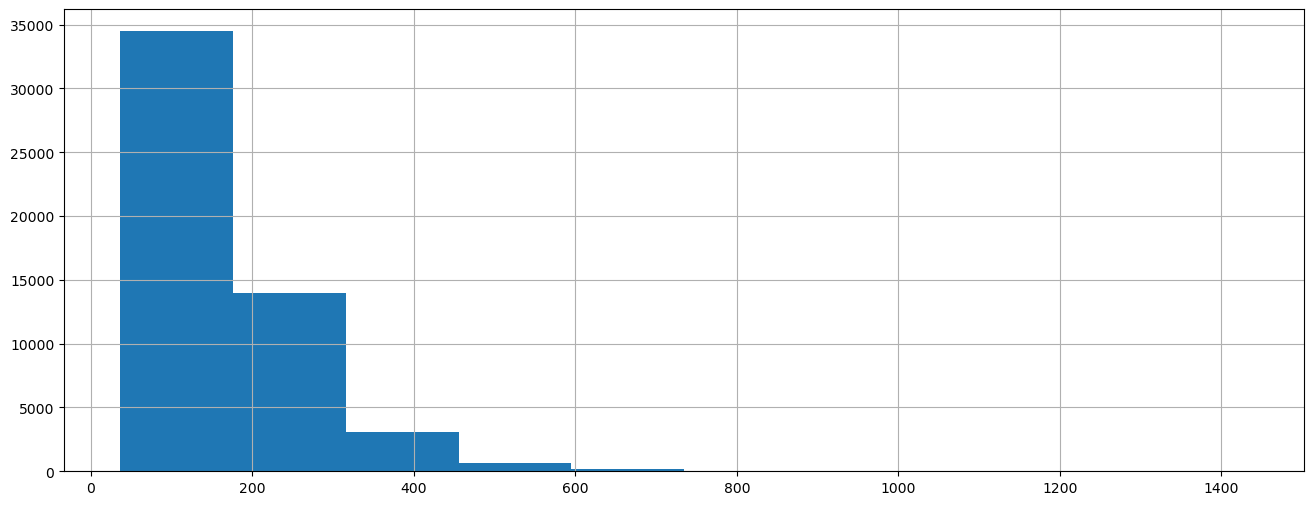

In [8]:
base.PremTPLM.hist()

PremTPLM est positive et a une distribution asymétrique avec une queue de distribution lourde à droite, donc la loi gamma pourrait être un bon choix pour modéliser PremTPLM.
Ou bien on peut modéliser le logarithme de PremTPLM :

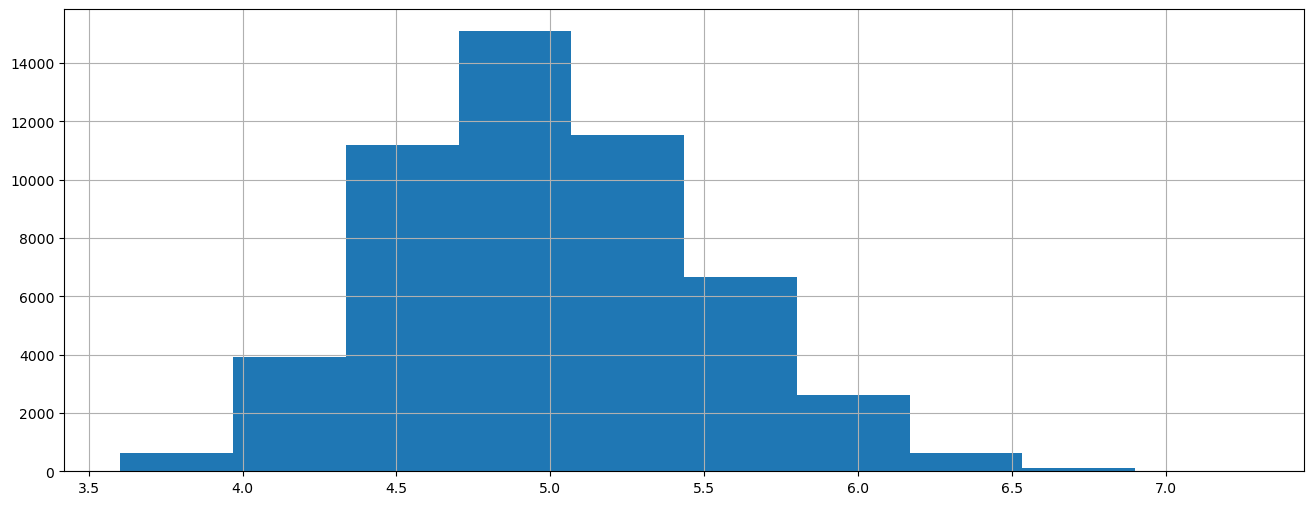

In [9]:
np.log(base.PremTPLM).hist()
plt.show()

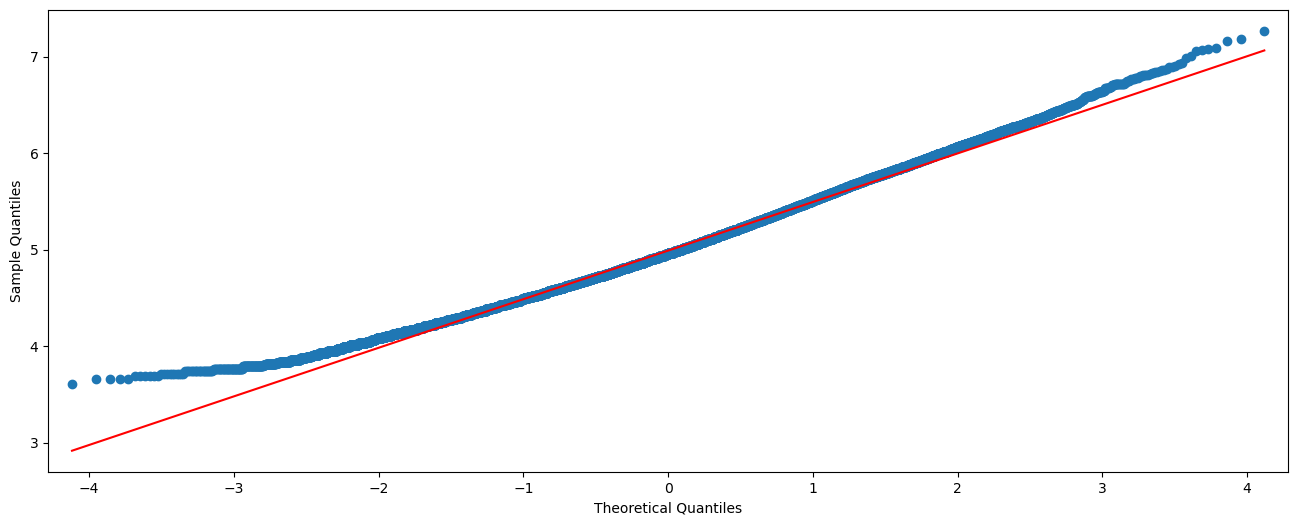

In [196]:
# QQ-Plot permettant de comparer la distribution de PremTot a une distribution gaussienne
qqplot(np.log(base.PremTPLM), line='s')
plt.show()

D'après l'histogramme et le graphique QQ-Plot, le log de PremTPLM semble proche d'une loi normale. Vérifions le avec le test de normalité de Shapiro-Wilk :

In [197]:
# Test de normalité
stat, p = shapiro(np.log(base.PremTot))
print('Statistics=%.3f, p=%.3f' % (stat, p)) # affiche la valeur de la Statistique et de la p-value

# Interprétation
alpha = 0.05
if p > alpha:
    print("On accepte H0: log(PremTot) est gaussien")
else:
    print("On rejette H0: log(PremTot) n'est pas gaussien")

Statistics=0.999, p=0.000
On rejette H0: log(PremTot) n'est pas gaussien


C:\Users\bspb1\anaconda3\lib\site-packages\scipy\stats\_morestats.py:1800: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


On ne peut pas modéliser PremTPLM, ou son log, par une loi normale. Réessayons la première option: modélisation par une loi gamma : 

In [198]:
base.PremTPLM.describe()  # indicateurs descriptifs de la variable

count    52379.000000
mean       167.729441
std         96.791795
min         36.700000
25%        102.500000
50%        141.500000
75%        204.800000
max       1432.700000
Name: PremTPLM, dtype: float64

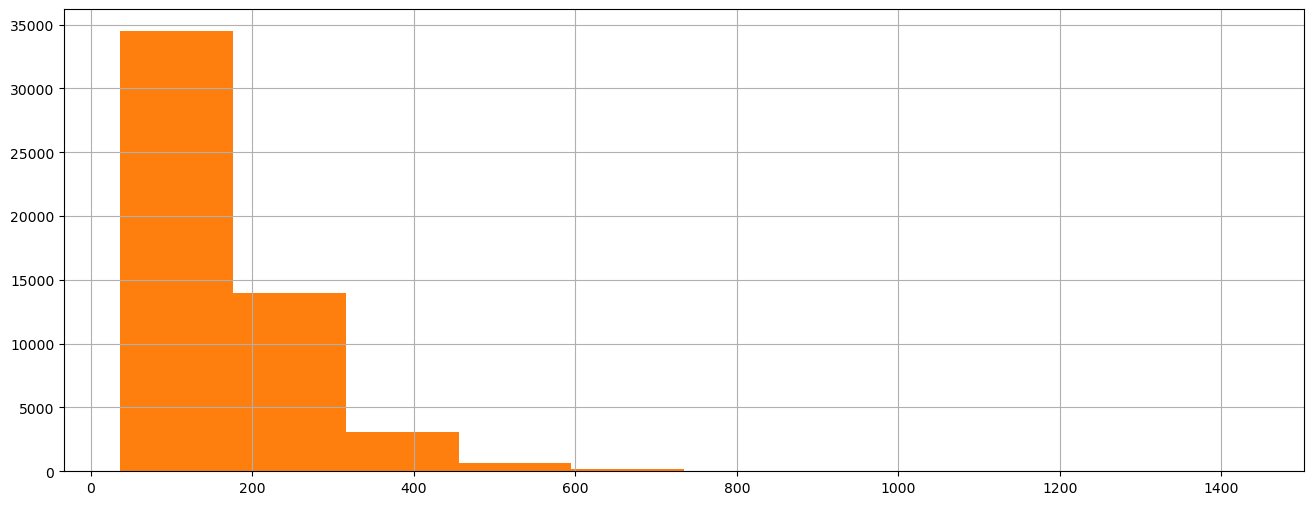

In [200]:
base.PremTPLM.hist()
plt.show()

### Estimation des paramètres alpha et beta par méthode des moments et du maximum de vraisemblance

### Methode des moments

In [201]:
# Estimation des paramètres alpha et beta par la méthode des moments
alpha_mm = np.mean(base.PremTPLM)**2 / np.var(base.PremTPLM)
beta_mm = np.var(base.PremTPLM) / np.mean(base.PremTPLM)

print("alpha =", alpha_mm)
print("beta =", beta_mm)

alpha = 3.0029617720735913
beta = 55.85467079470716


### Méthode du maximum de vraisemblance

In [202]:
dist = getattr(scipy.stats, "gamma")

# Modéliser la loi
param = dist.fit(base.PremTPLM)

In [203]:
print("alpha : ",param[0])
print("loc : ",param[1])
print("beta : ",param[2])

alpha :  0.10878905303233222
loc :  36.699999999999996
beta :  3.5020367343756025


On conserve les estimations du maximum de vraisemblance pour le test de Kolmogorov-Smirnov :

In [204]:
alpha_MV = param[0]
loc_MV = param[1]
beta_MV= param[2]

### Test d'adéquation de Kolmogorov Smirnov

On reprend les paramètres alpha et beta calculés avec la méthode des moments

In [205]:

gamma_dist = gamma(alpha_MV,loc_MV, scale=beta_MV) 
test_stat, p_value = kstest(base.PremTPLM, gamma_dist.cdf)

In [206]:
# Afficher les résultats du test
print("Test statistique :", test_stat)
print("P-valeur :", p_value)

Test statistique : 0.9941053362906679
P-valeur : 0.0


p-value très petite, la distribution Gamma ne convient pas. On choisit donc de faire une modélisation non paramétrique :

In [207]:
base_prem.PremTPLM.describe()

count    52379.000000
mean       167.729441
std         96.791795
min         36.700000
25%        102.500000
50%        141.500000
75%        204.800000
max       1432.700000
Name: PremTPLM, dtype: float64

# Modélisation non paramétrique

### Séparation en échantillon d'apprantissage et échantillon de test :

Choix des variables les plus pertinentes pour la suite de l'analyse :

In [208]:
#X = base_prem[["Year","DrivAge","DrivGender","VehAge","VehClass","VehGas","Region"]];X

X = base_prem[["Year","DrivAge","VehAge"]];X    # on ne garde que les variables quantitatives
# variables explicatives

,Year,DrivAge,VehAge
0,2004,32.0,6.886679
1,2003,37.0,12.000000
2,2004,36.0,8.000000
3,2004,45.0,7.000000
4,2003,51.0,5.000000
...,...,...,...
52374,2003,45.0,10.000000
52375,2003,56.0,7.000000
52376,2003,45.0,12.000000
52377,2004,38.0,8.000000


In [209]:
Y = base_prem[["PremTPLM"]];Y
# variables à expliquer

,PremTPLM
0,260.2
1,96.1
2,355.6
3,141.3
4,143.7
...,...
52374,166.3
52375,69.1
52376,60.5
52377,273.2


In [210]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.10)
# On sépare la base en 90% d'apprentissage et 10% des données pour le test

# Apprentissage automatique: Algorithme Random Forest 

In [211]:
X_train

,Year,DrivAge,VehAge
35536,2003,35.0,10.0
50393,2003,49.0,1.0
22125,2003,44.0,1.0
41063,2003,42.0,13.0
12095,2004,43.0,13.0
...,...,...,...
12312,2003,35.0,10.0
18435,2003,28.0,5.0
38945,2003,32.0,2.0
37354,2004,45.0,5.0


On lance l'algorithme Random Forest :

L'algorithme de régression Random Forest est un modèle d'apprentissage automatique qui combine plusieurs arbres de décision pour obtenir une prédiction plus précise et robuste. Le principe est de construire un ensemble d'arbres de décision, où chaque arbre est construit à partir d'un échantillon aléatoire de données et d'un échantillon aléatoire de variables. Lors de la prédiction, les prédictions de tous les arbres sont agrégées pour obtenir une prédiction finale.

Voici les étapes principales de l'algorithme de régression Random Forest :

1. Sélection d'un échantillon aléatoire de données avec remplacement (bootstrap).
2. Sélection d'un échantillon aléatoire de variables (features) pour construire l'arbre de décision.
3. Construction d'un arbre de décision en utilisant l'échantillon de données et de variables sélectionné.
4. Répétition des étapes 1 à 3 pour construire plusieurs arbres de décision.
5. Agrégation des prédictions de tous les arbres pour obtenir une prédiction finale.
L'algorithme de régression Random Forest est utilisé pour prédire des variables continues (régression) en utilisant des données d'entrée (features) qui peuvent être continues ou catégorielles. Pour utiliser Random Forest sur Python, vous pouvez utiliser la bibliothèque scikit-learn :

In [212]:
# Création d'un modèle de forêt aléatoire
rf = RandomForestRegressor(n_estimators=100, max_depth=5)

# Entraînement du modèle sur les données d'entraînement X_train et y_train
rf.fit(X_train, Y_train)

# Prédiction sur les données de test X_test
Y_pred = rf.predict(X_test)

C:\Users\bspb1\AppData\Local\Temp\ipykernel_3232\1943506463.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train, Y_train)


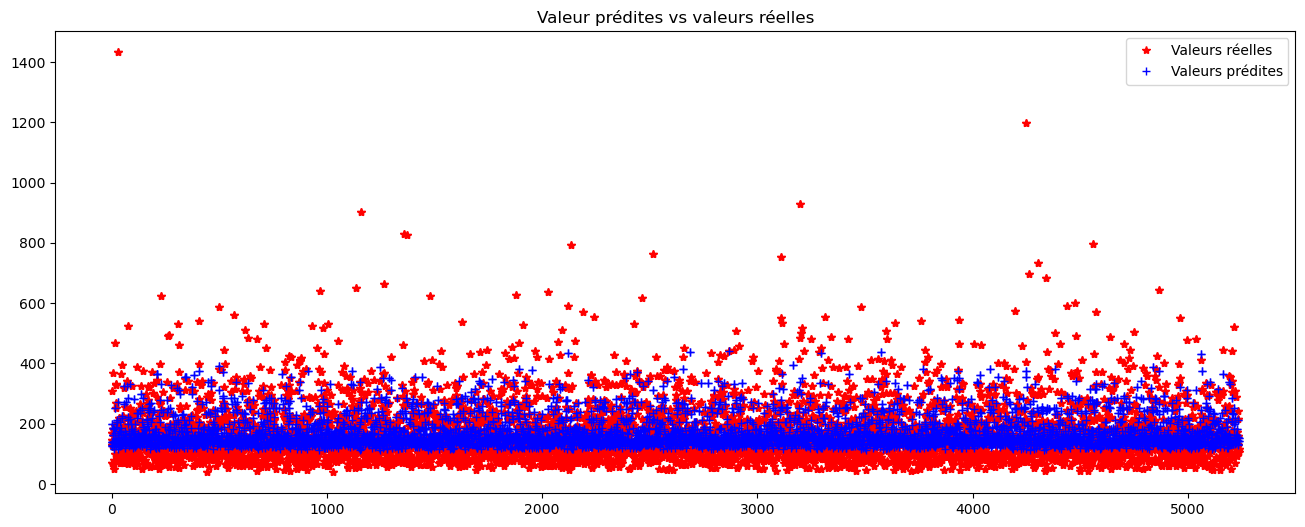

In [214]:
plt.plot(range(len(Y_test)), Y_test, 'r*', range(len(Y_test)), Y_pred, 'b+') 
# mais n'as pas vraiment de sens pour une var discrète car on compare une espérance à un support..
plt.title('Valeur prédites vs valeurs réelles')
plt.legend(['Valeurs réelles', 'Valeurs prédites']) 
plt.show()

La prédiction semble avoir très bien fonctionné, bien qu'on ait du mal à prédire les primes extrêmes

In [215]:
Y_pred.mean()

168.43125249676314

In [216]:
Y_test.mean()   # l'espérance prédite de la prime TPLM est extrêmement proches de la vraie valeur

PremTPLM    167.839366
dtype: float64

In [217]:
Y_pred.sum() - Y_test.sum()
# écart très petit sur tout le portefeuille

PremTPLM    3100.300578
dtype: float64

On a un très petit écart entre la prime à prédire et la prime prédite

In [218]:
mean_squared_error(Y_pred,Y_test)  
# l'erreur quadratique moyenne MSE est relativement petit, le modèle est bon

7071.576180120841

On réalise une validation croisée pour évaluer ses performances

In [219]:
# Création du modèle Random Forest
rf = RandomForestRegressor(n_estimators=100, random_state=42)

# Évaluation du modèle avec une validation croisée de 5 itérations
scores = cross_val_score(rf, X_train, Y_train, cv=5, scoring='neg_mean_squared_error')

# Affichage de la performance moyenne et de l'écart-type
print('MSE moyen:', -scores.mean())
print('Écart-type:', scores.std())

C:\Users\bspb1\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\bspb1\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\bspb1\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\bspb1\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y wa

MSE moyen: 7245.845917825133
Écart-type: 256.7740736484098


On a pu prédire le montant de PremTPLM avec les variables explicatives Year, DrivAge et VehAge en utilisant l'algorithme Random Forest

Ce modèle pourrait être utilisé dans le futur comme outil de tarification afin de proposer à partir de l'âge du conducteur, de son véhicule et des données de l'année en cours de proposer une prime pour la garanté responsabilité civile obligatoire